In [2]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix,accuracy_score
from sklearn.metrics import accuracy_score, classification_report, precision_score,recall_score 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from tabulate import tabulate
import seaborn as sns
import pandas as pd
import numpy as np
import time
import warnings

In [3]:
start = time.perf_counter()

In [4]:
warnings.filterwarnings('ignore')

In [5]:
#Import Data
dataset = pd.read_csv(r'C:\Users\deep-\Desktop\data.csv')

pd.set_option('display.max_columns', None)
dataset.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,NetValueGrowthRate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),FixedAssetsTurnoverFrequency,Net Worth Turnover Rate (times),RevenuePerPerson,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,CashCurrentLiability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,FixedAssetstoAssets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt                                                 6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [7]:
dataset.describe()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,NetValueGrowthRate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),FixedAssetsTurnoverFrequency,Net Worth Turnover Rate (times),RevenuePerPerson,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,CashCurrentLiability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,FixedAssetstoAssets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.741753,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,

In [8]:
dataset['Bankrupt'].value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

In [9]:
dataset.shape

(6819, 96)

In [10]:
dataset.isnull().any()

Bankrupt                                                   False
ROA(C) before interest and depreciation before interest    False
ROA(A) before interest and % after tax                     False
ROA(B) before interest and depreciation after tax          False
Operating Gross Margin                                     False
                                                           ...  
Liability to Equity                                        False
Degree of Financial Leverage (DFL)                         False
Interest Coverage Ratio (Interest expense to EBIT)         False
Net Income Flag                                            False
Equity to Liability                                        False
Length: 96, dtype: bool

<AxesSubplot:xlabel='Bankrupt', ylabel='count'>

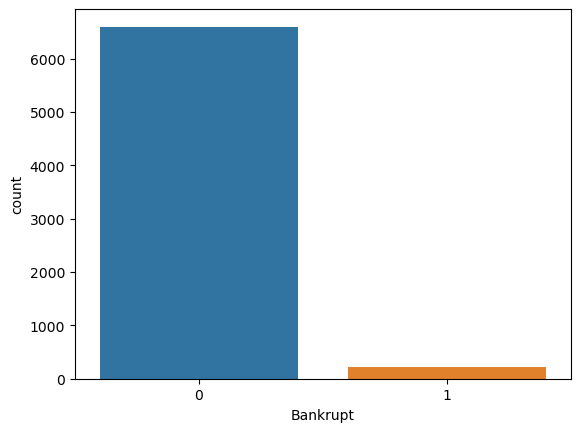

In [11]:
sns.countplot('Bankrupt', data = dataset)

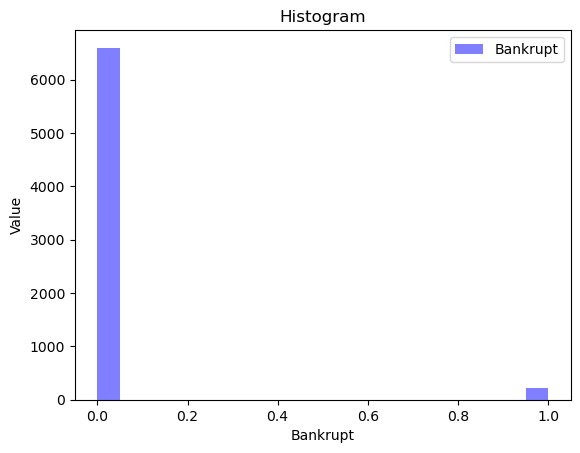

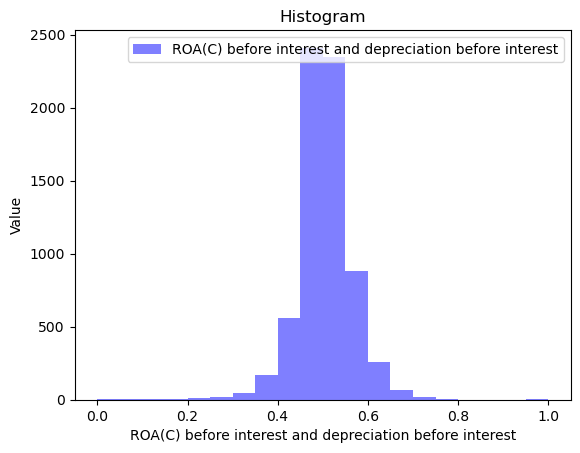

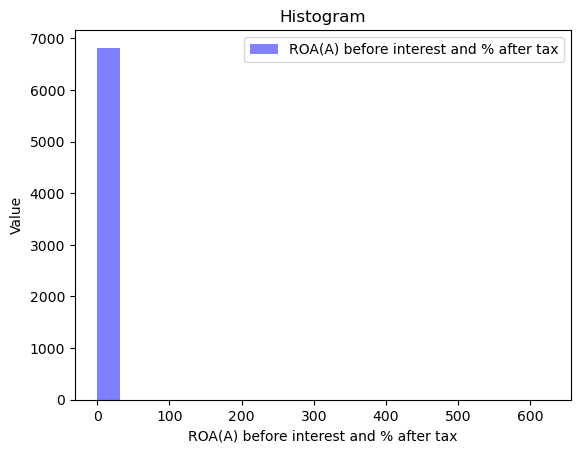

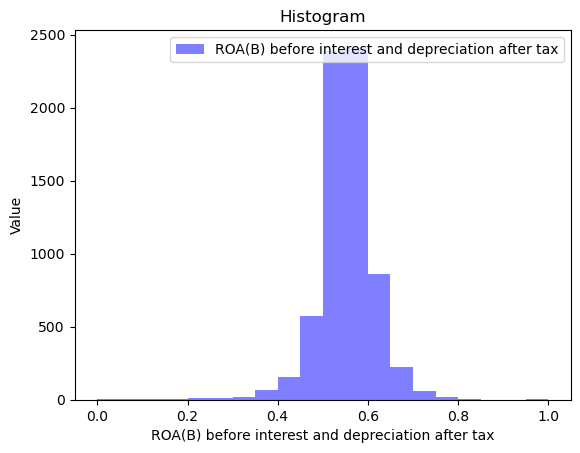

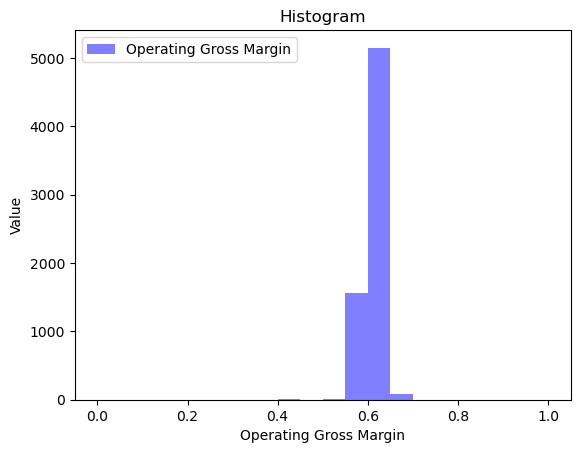

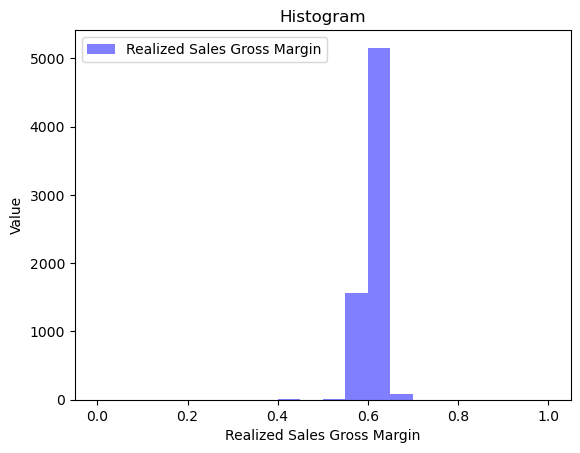

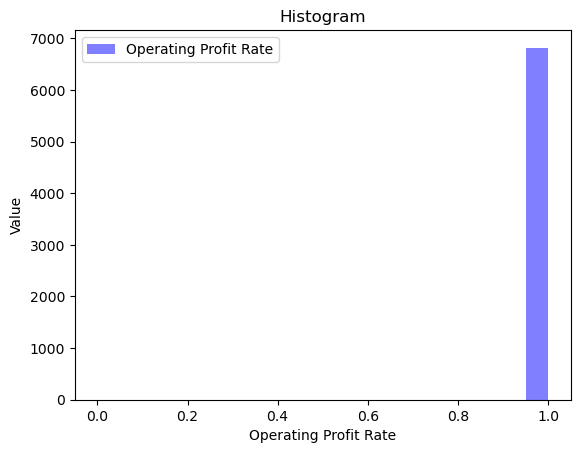

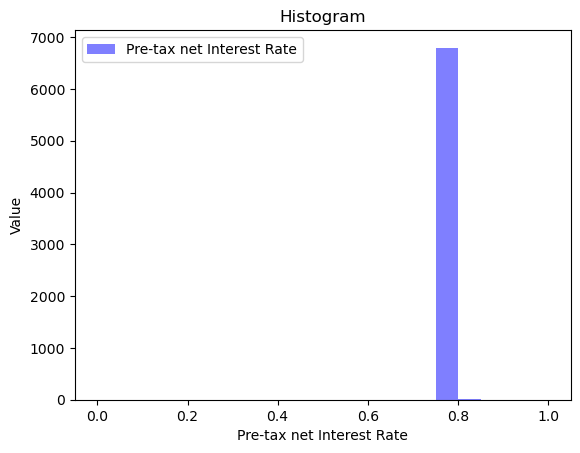

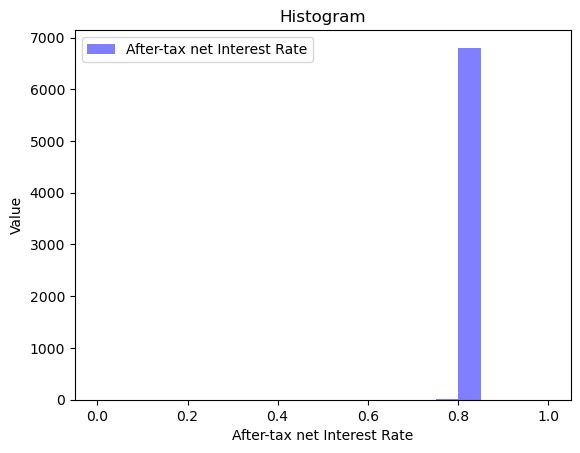

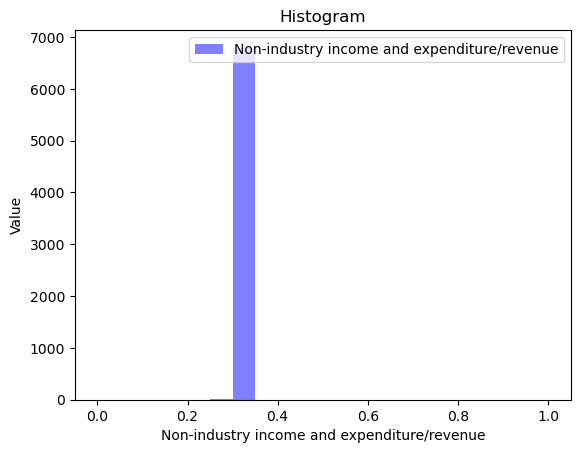

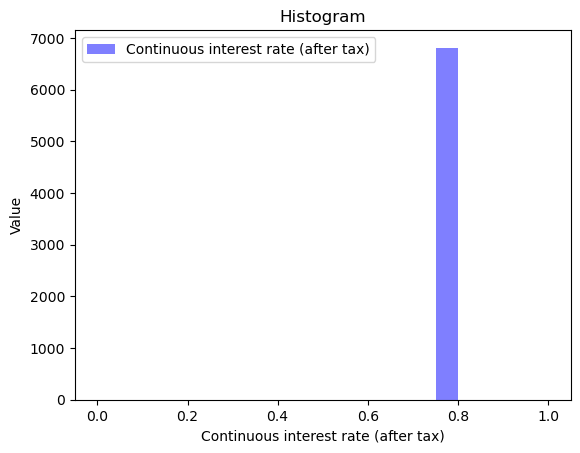

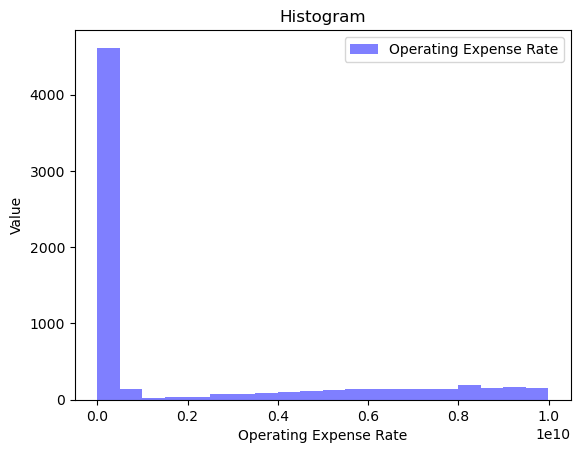

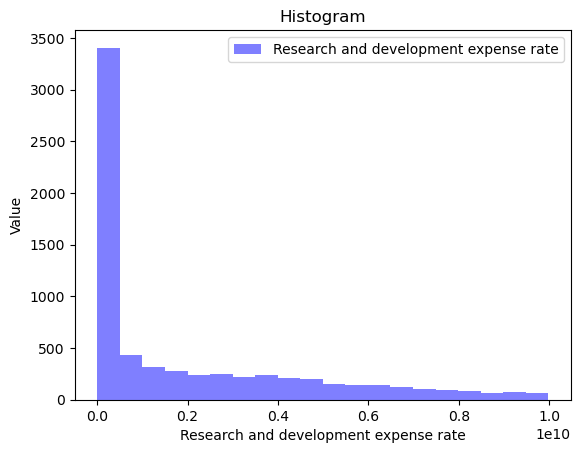

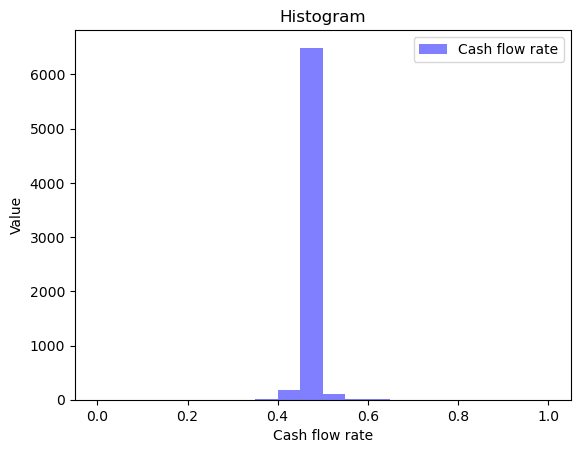

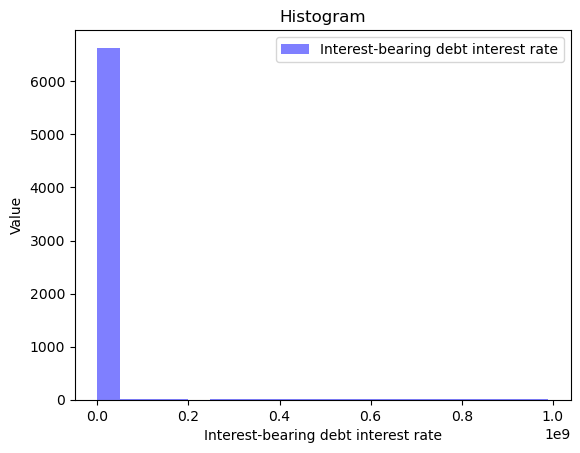

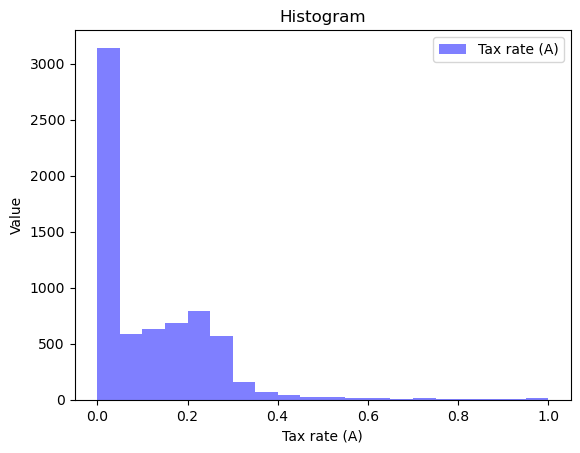

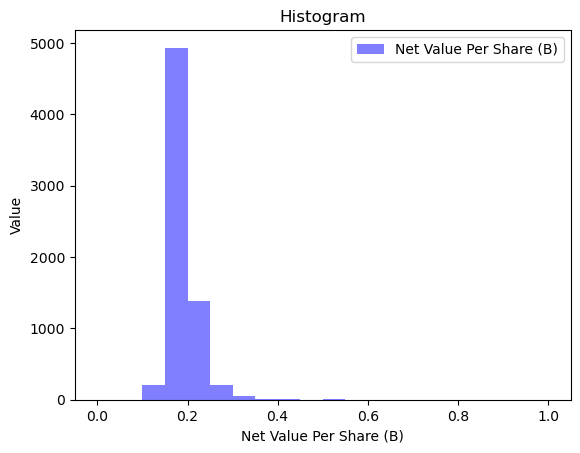

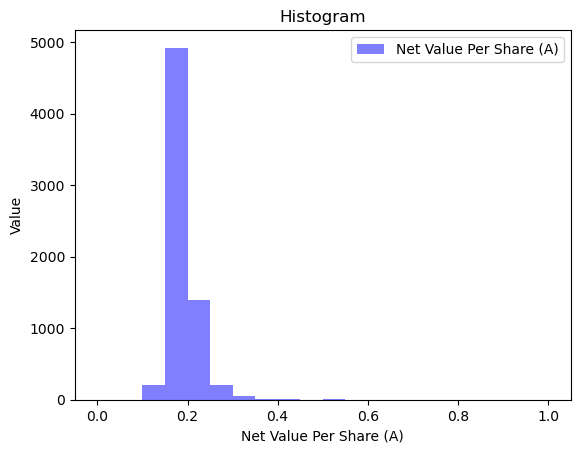

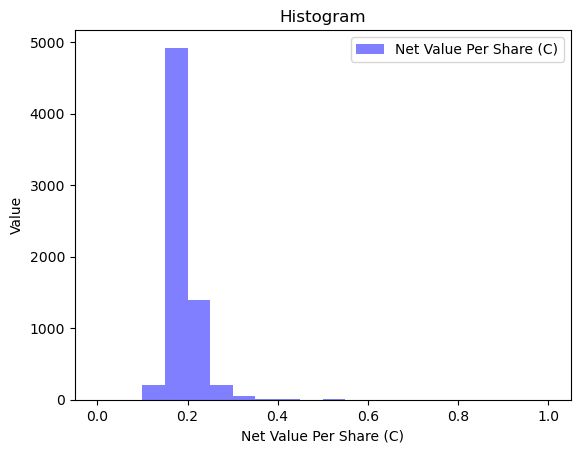

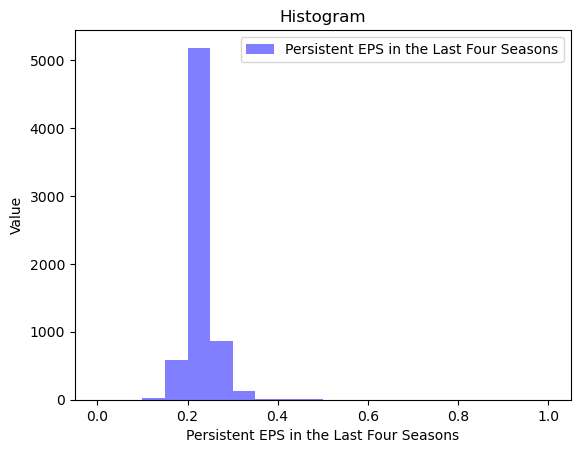

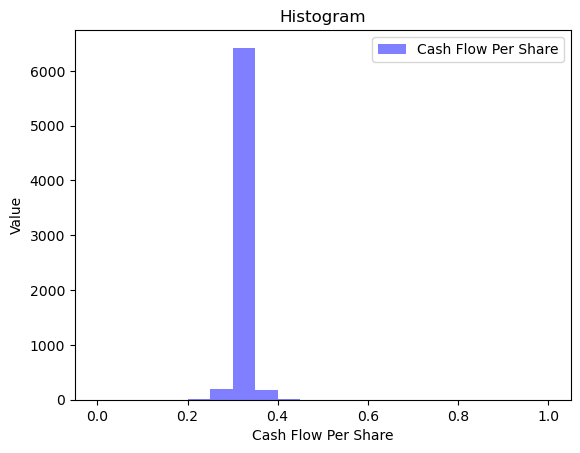

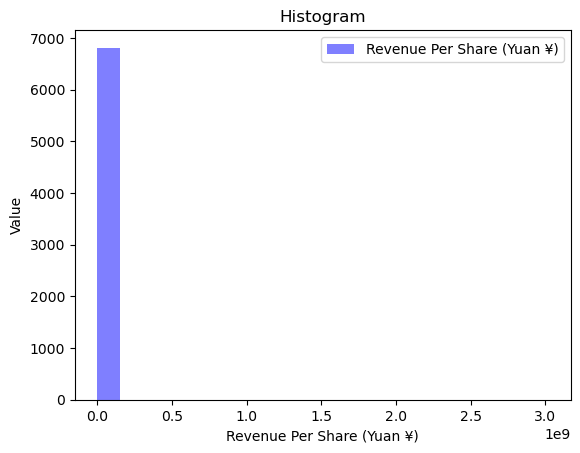

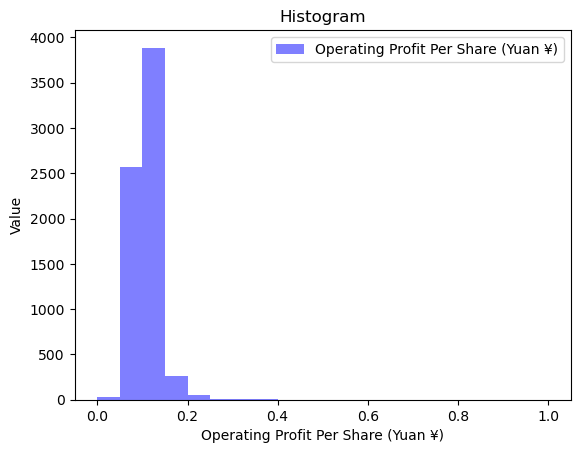

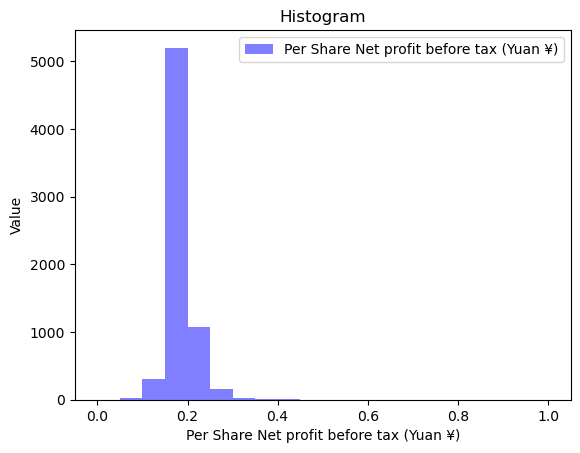

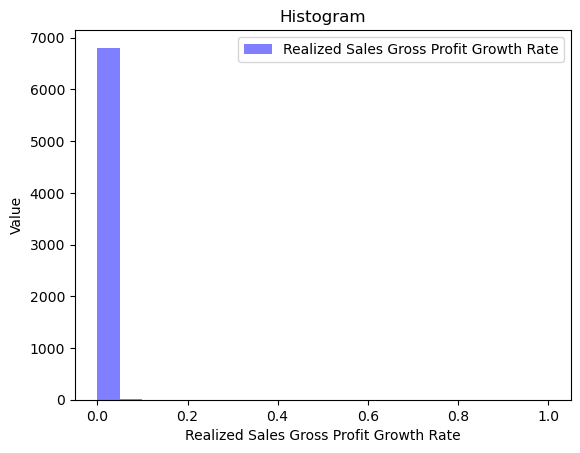

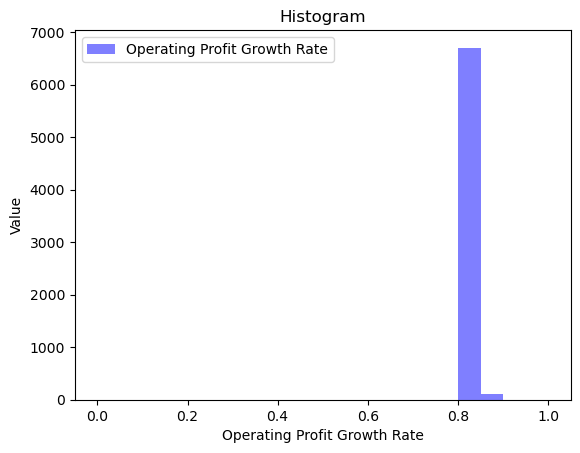

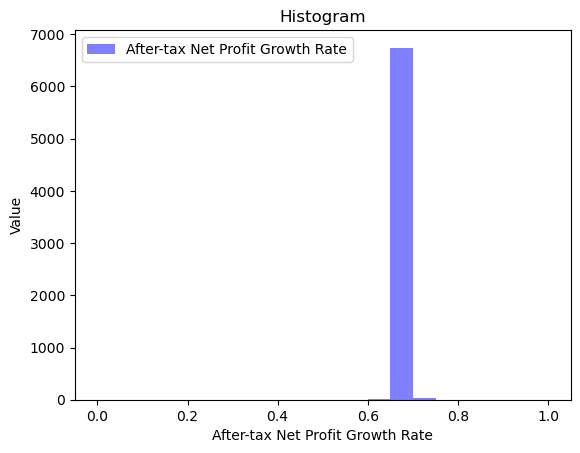

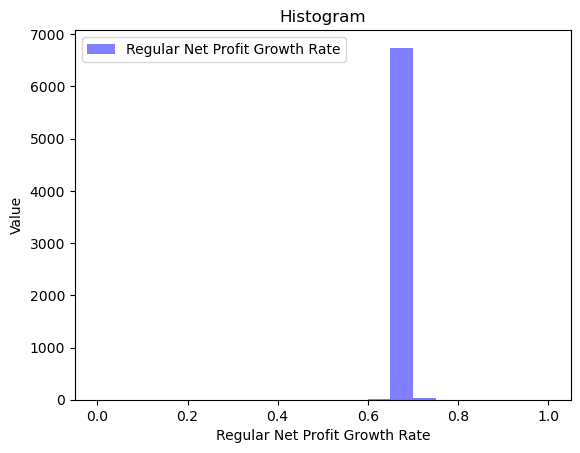

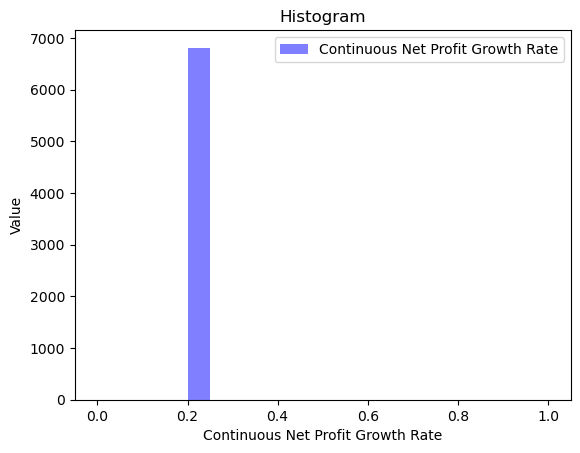

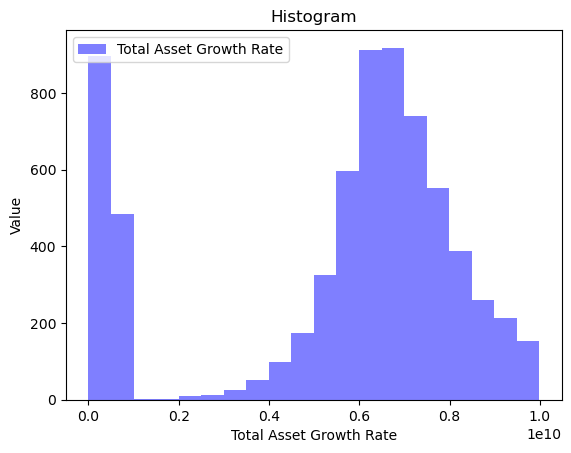

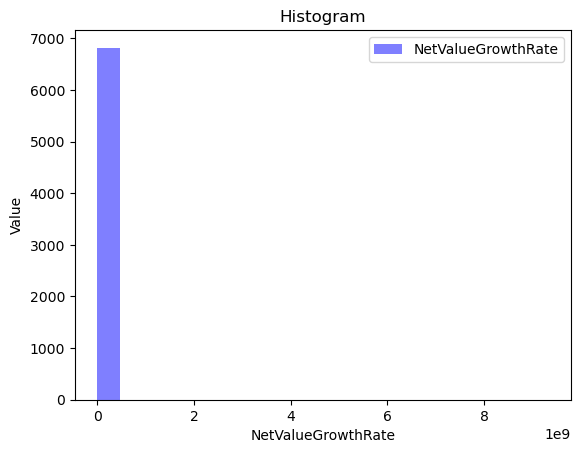

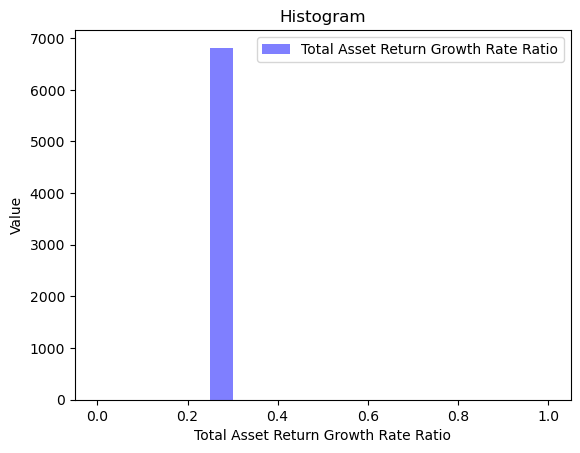

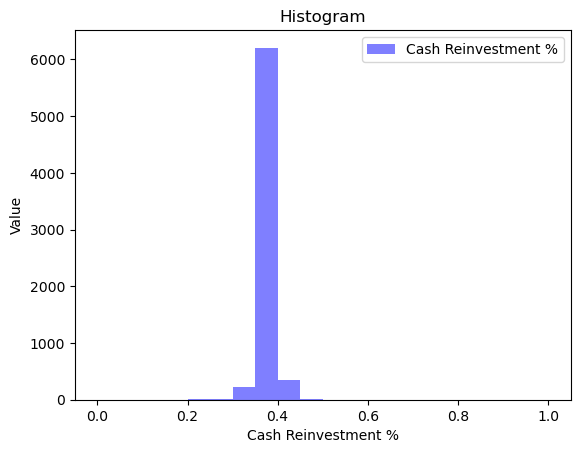

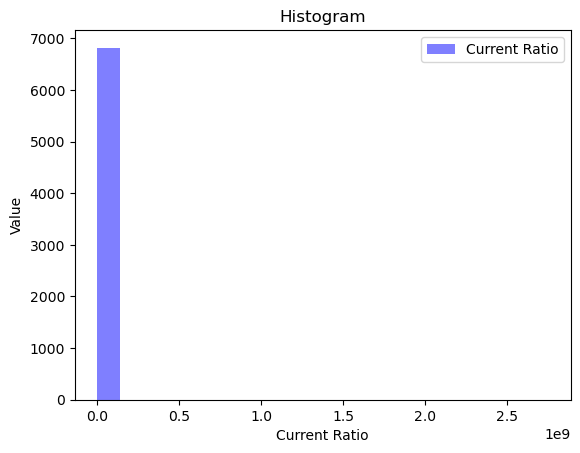

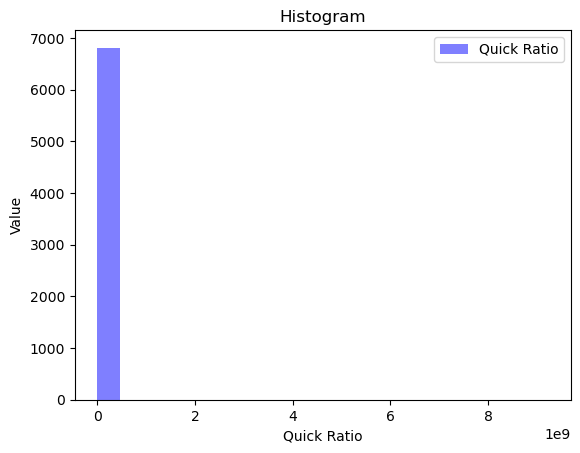

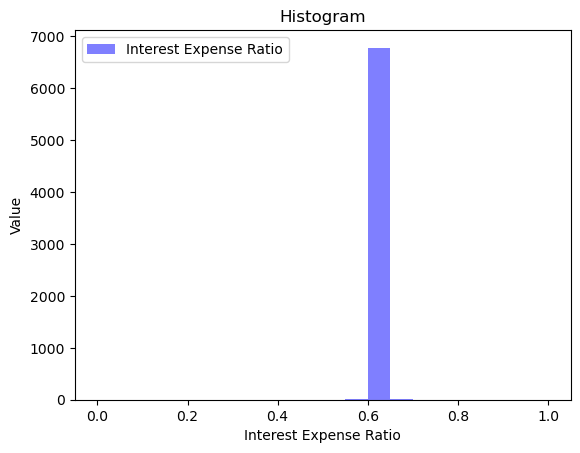

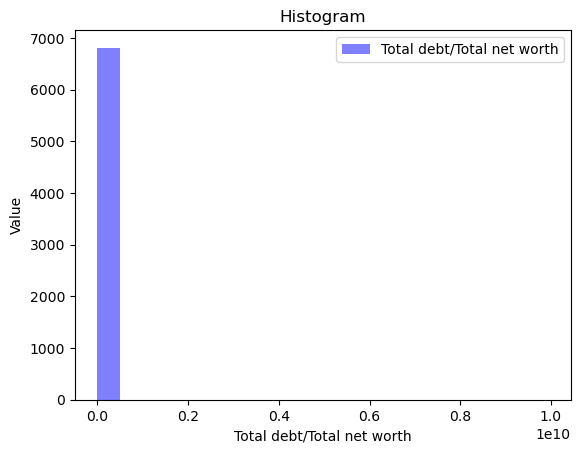

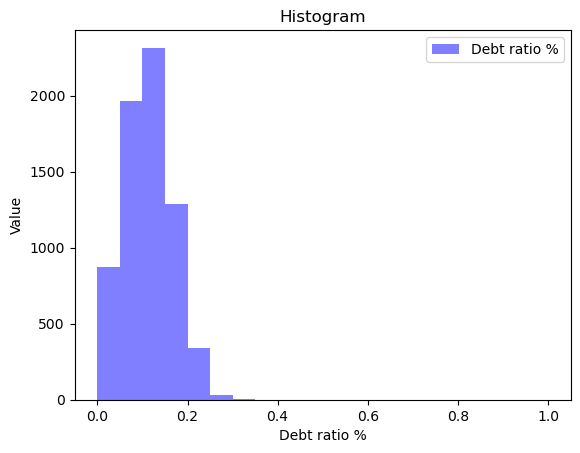

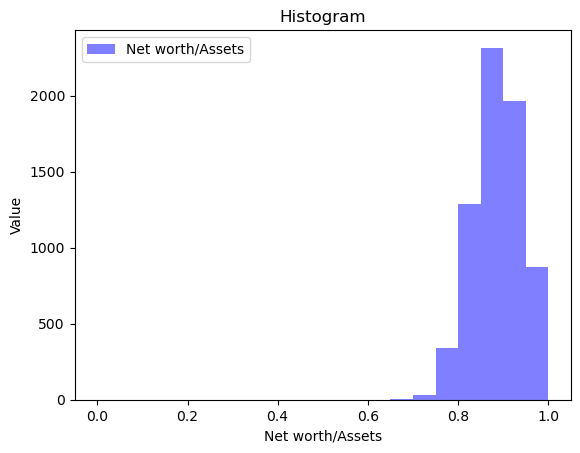

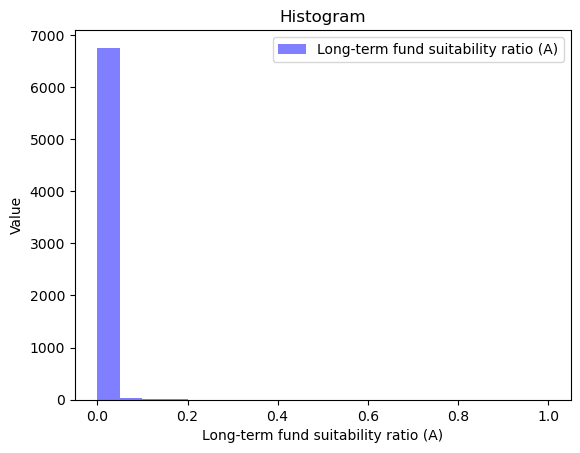

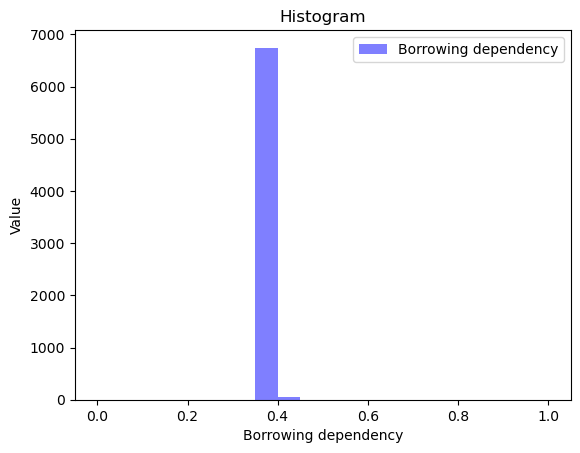

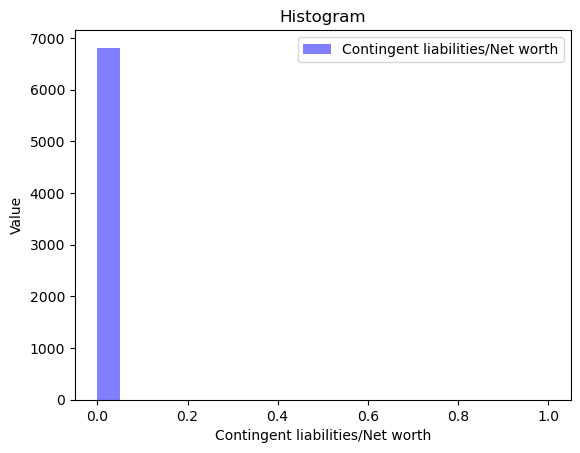

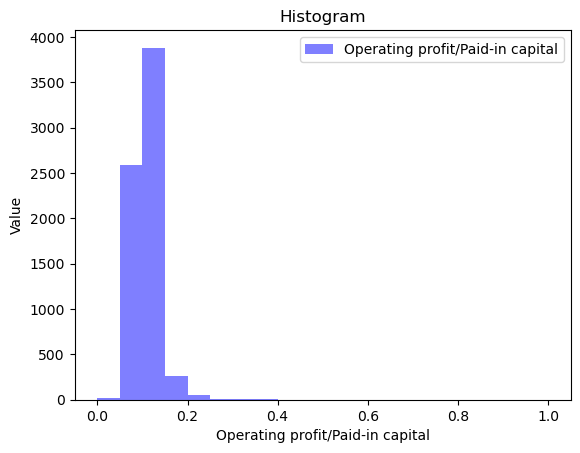

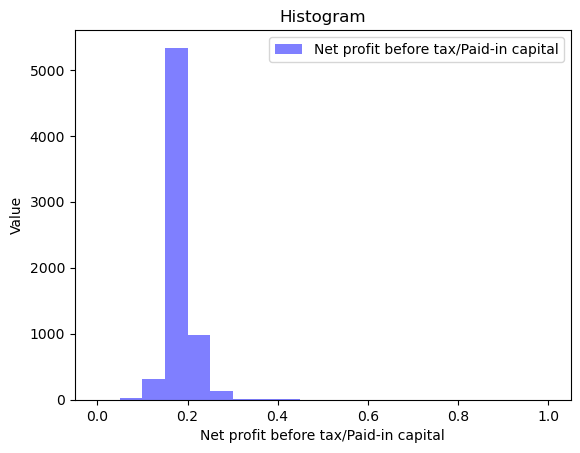

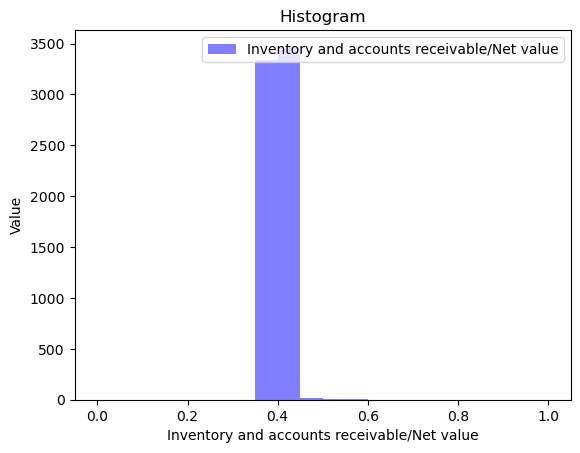

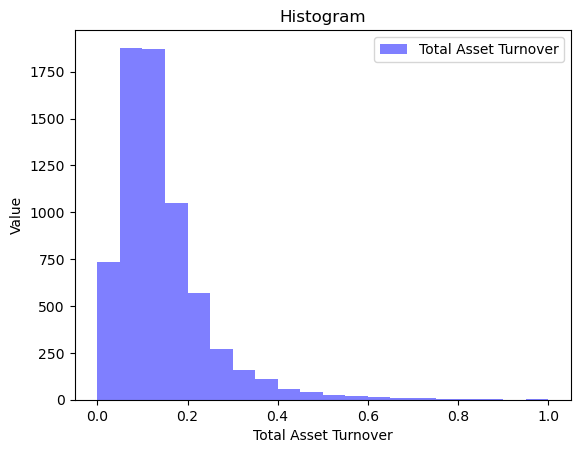

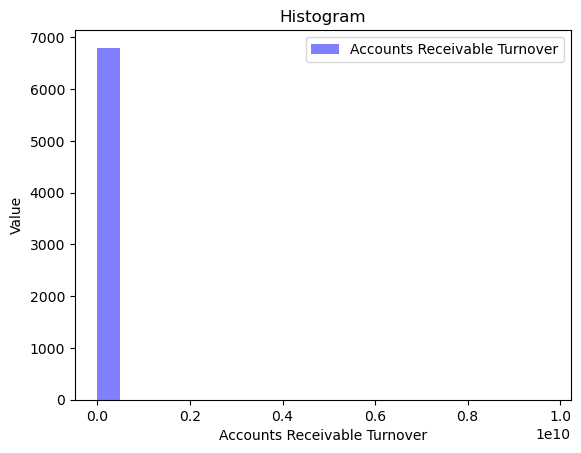

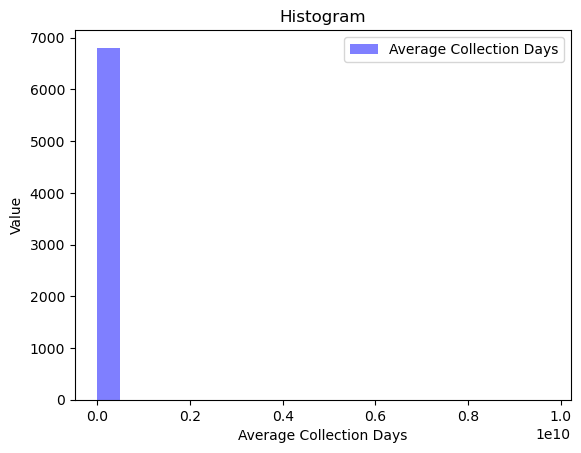

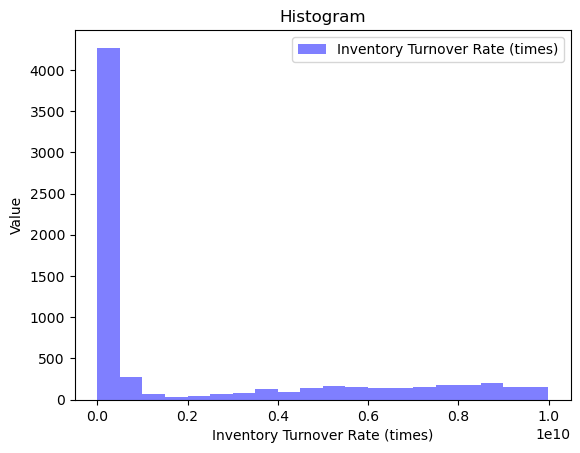

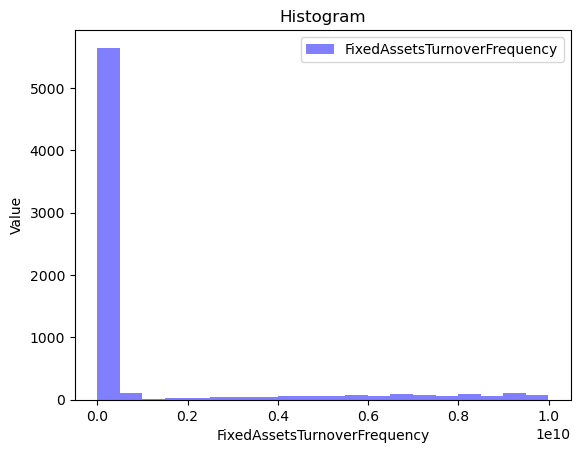

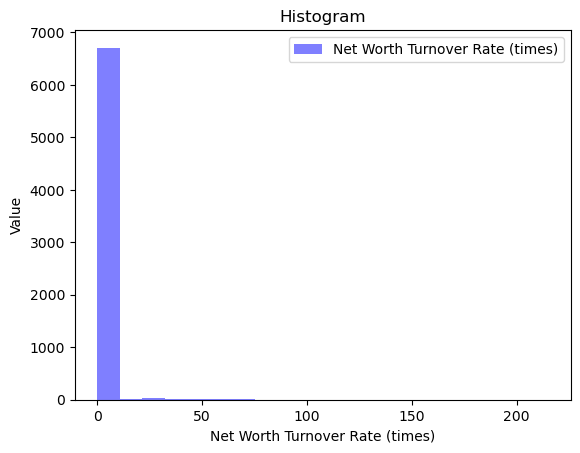

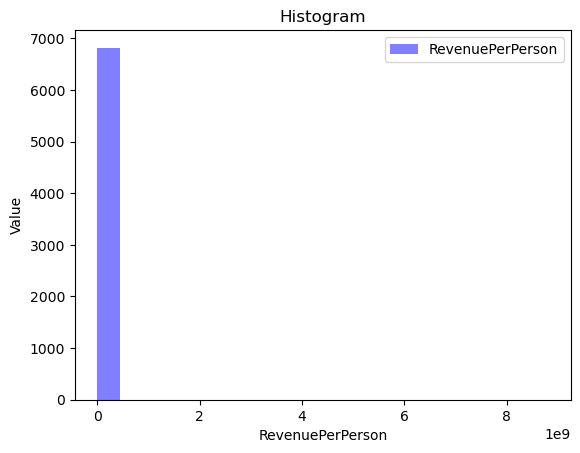

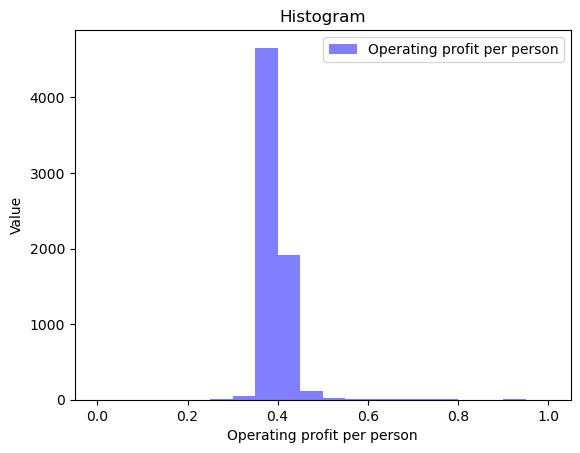

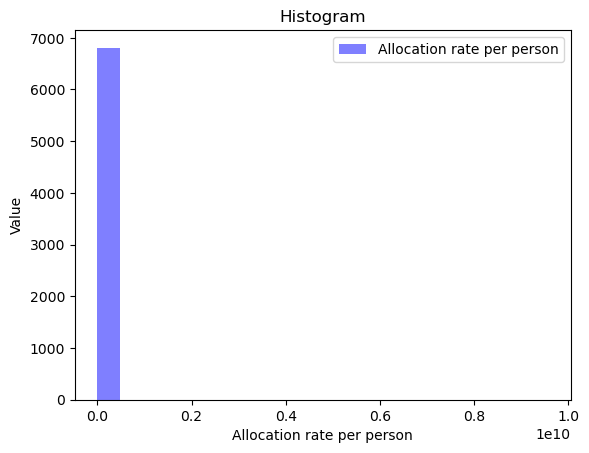

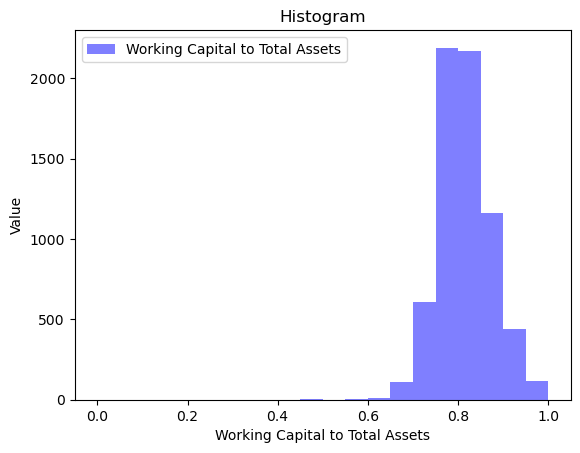

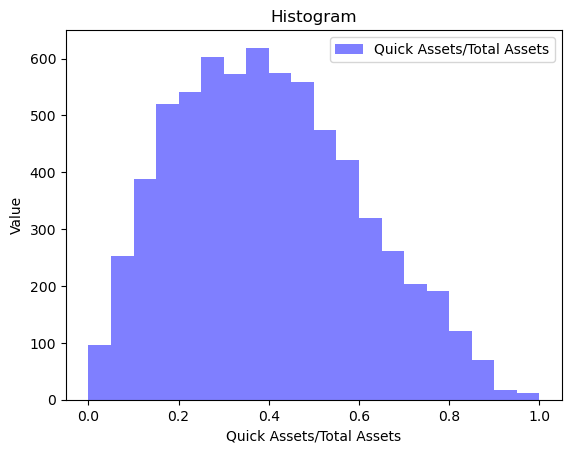

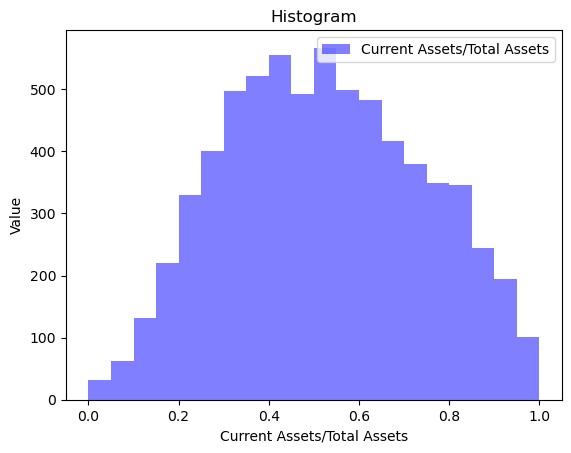

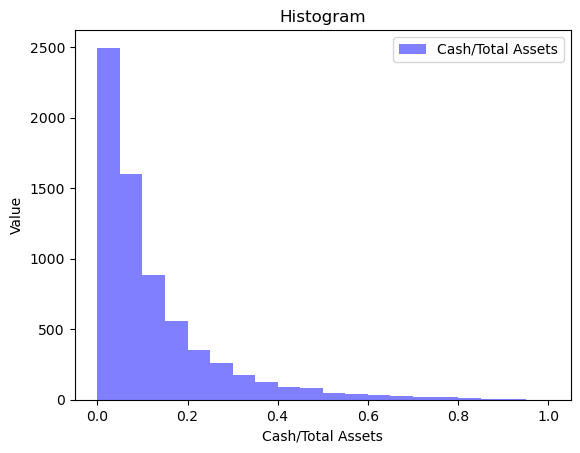

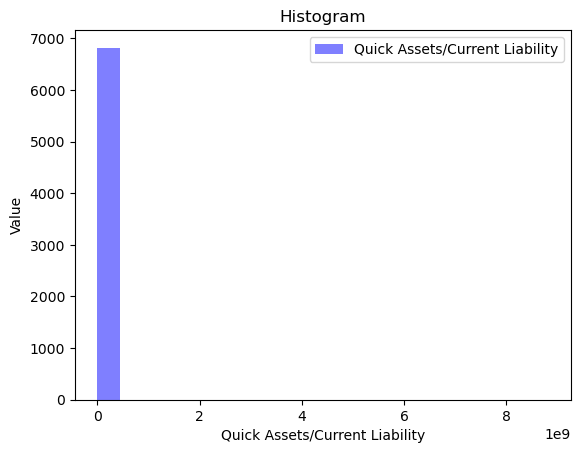

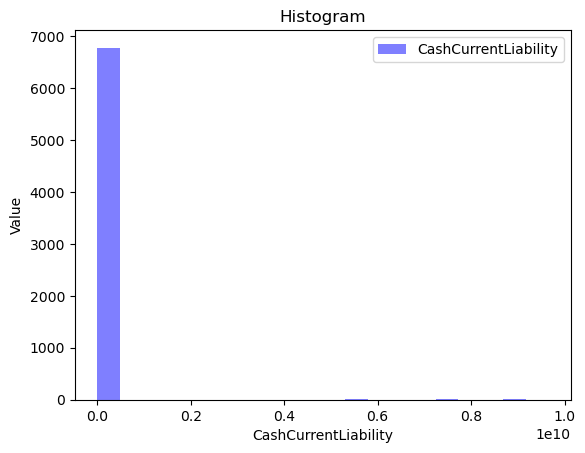

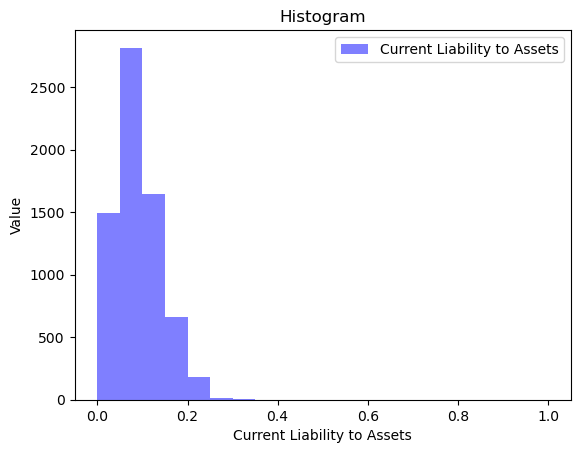

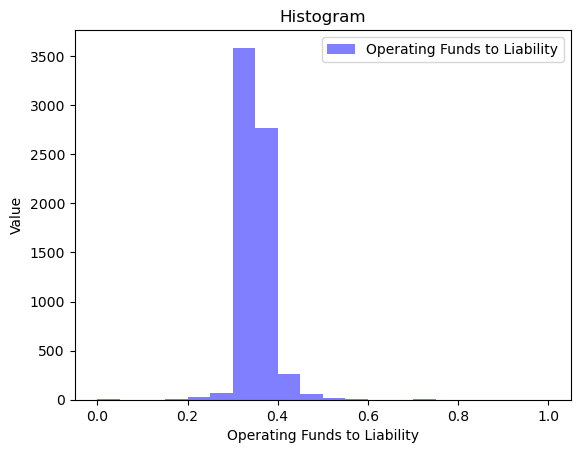

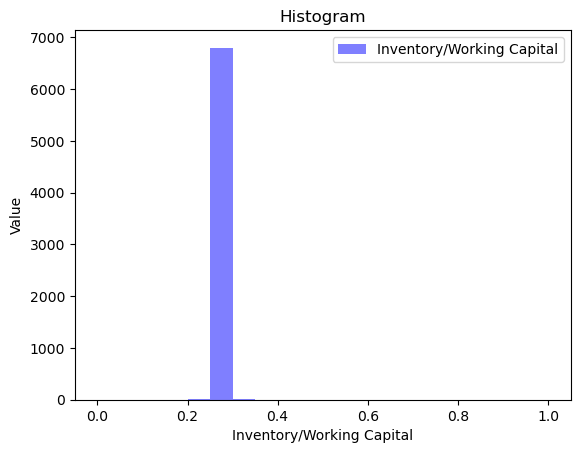

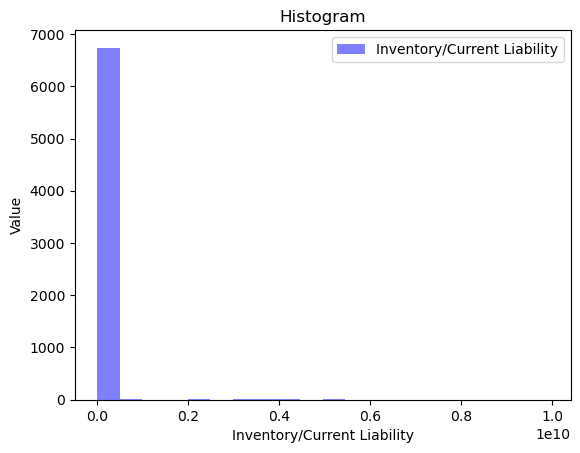

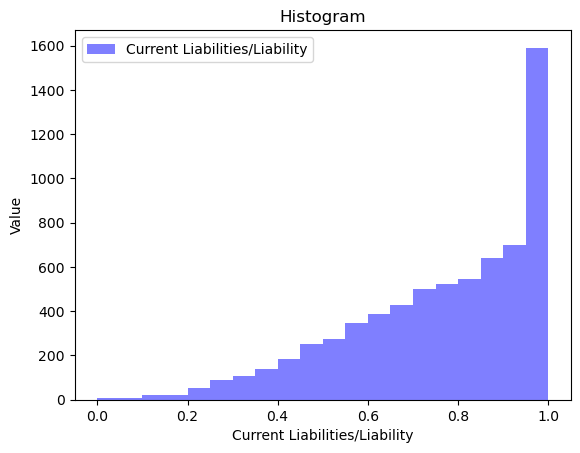

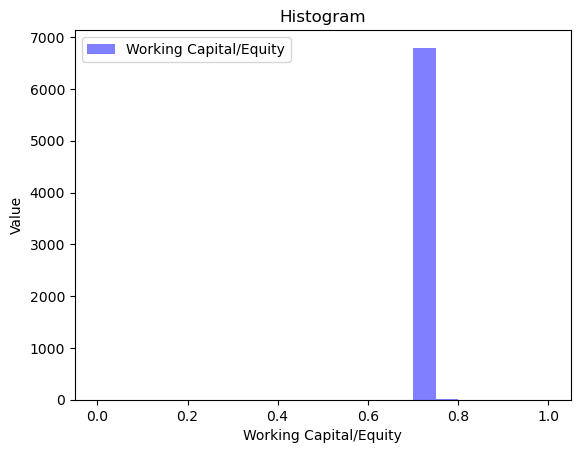

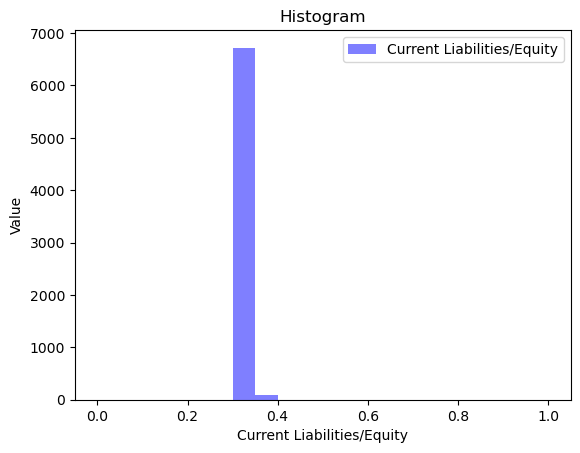

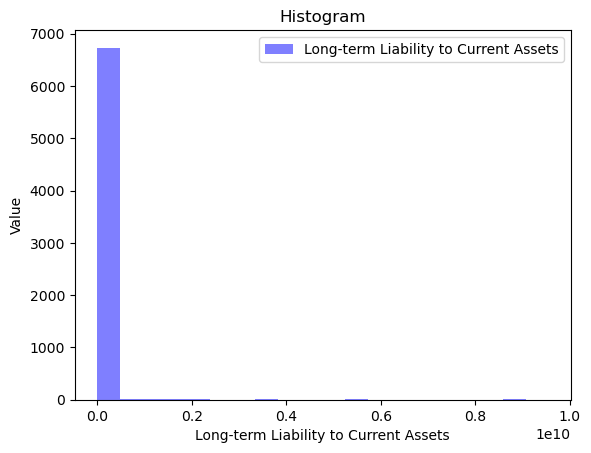

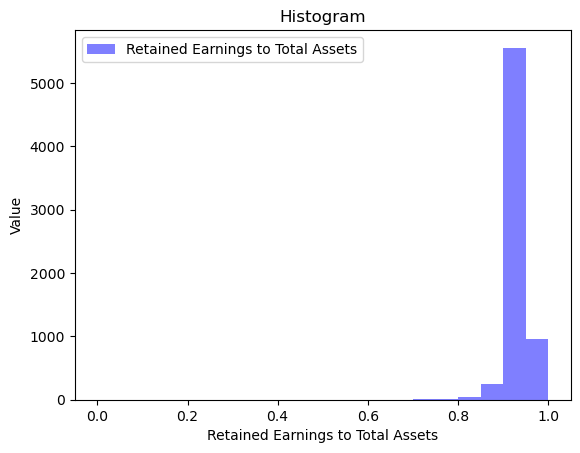

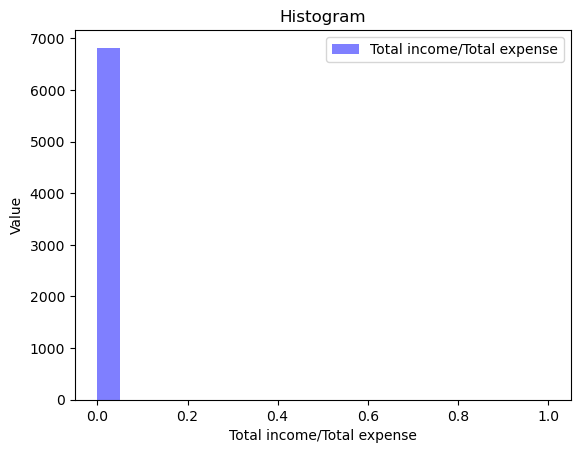

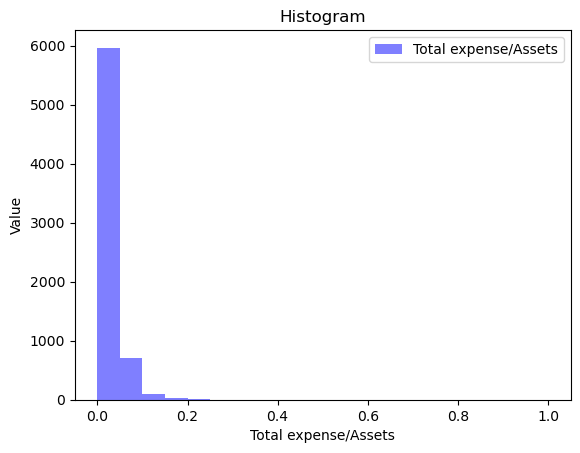

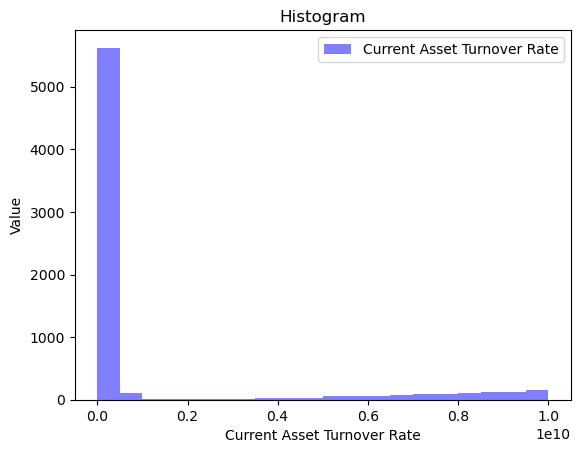

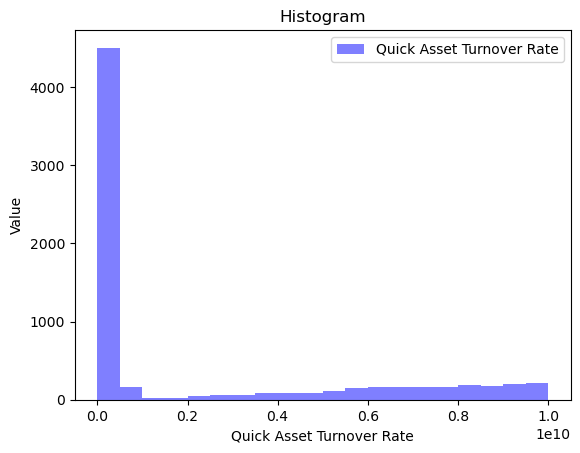

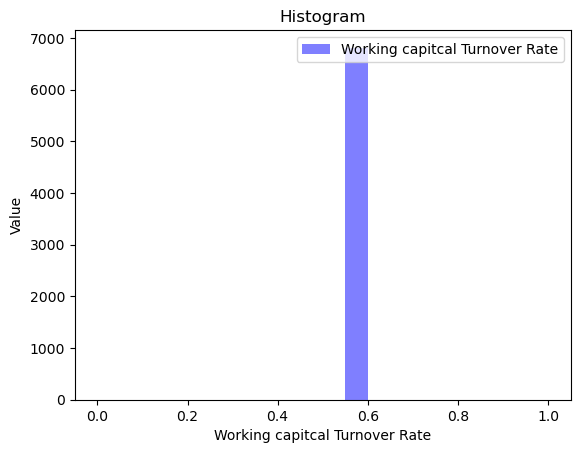

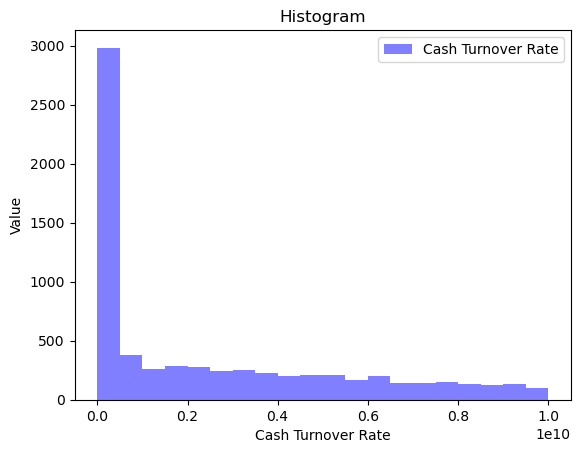

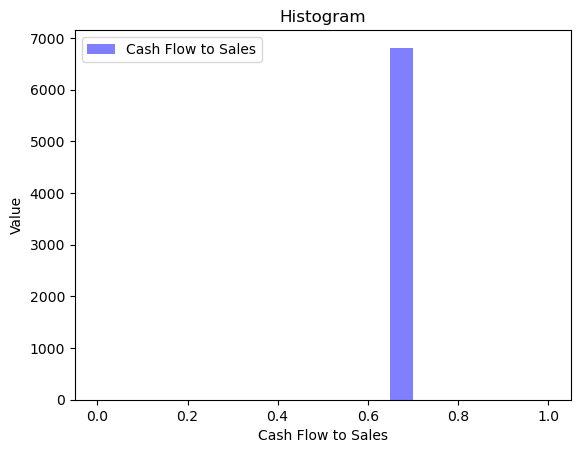

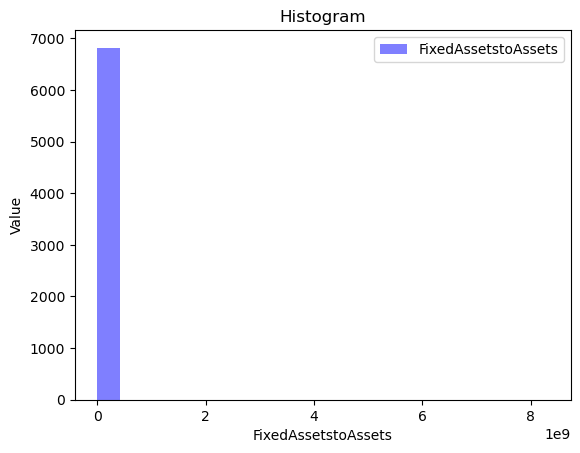

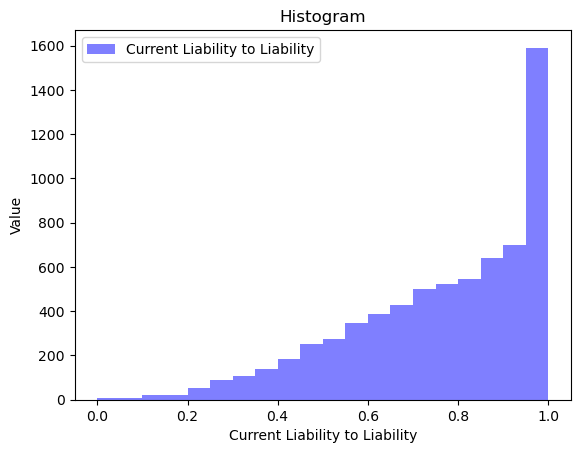

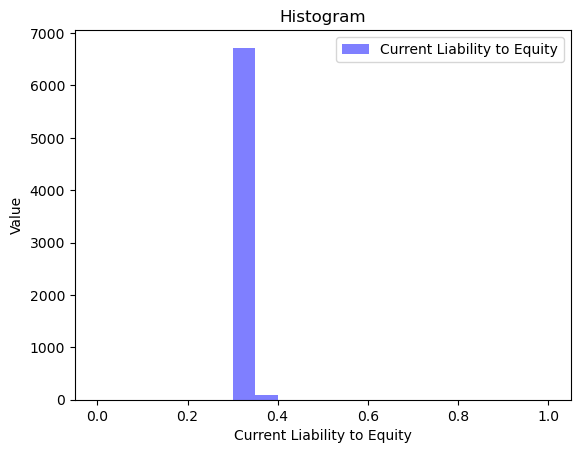

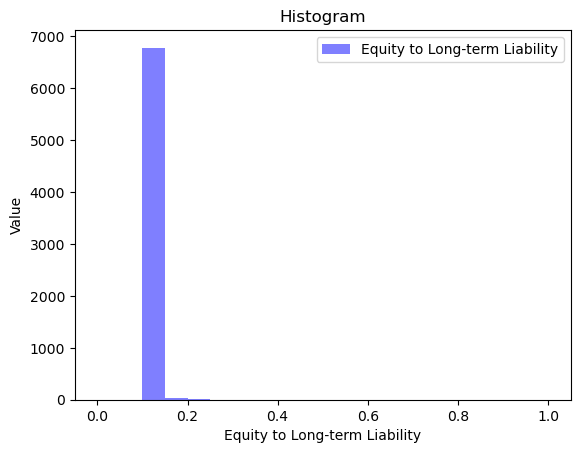

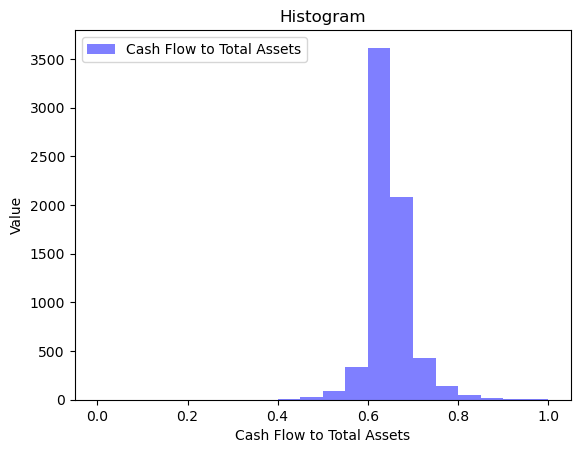

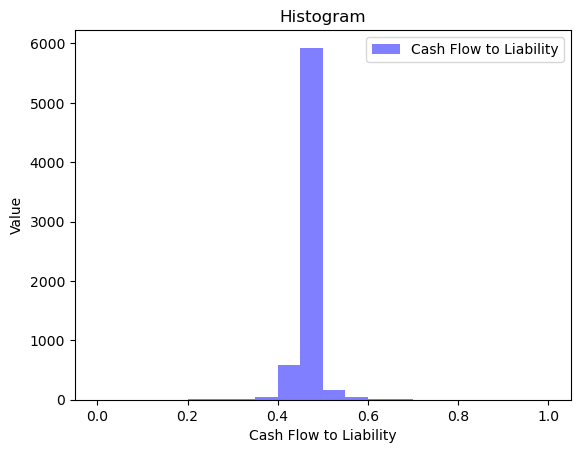

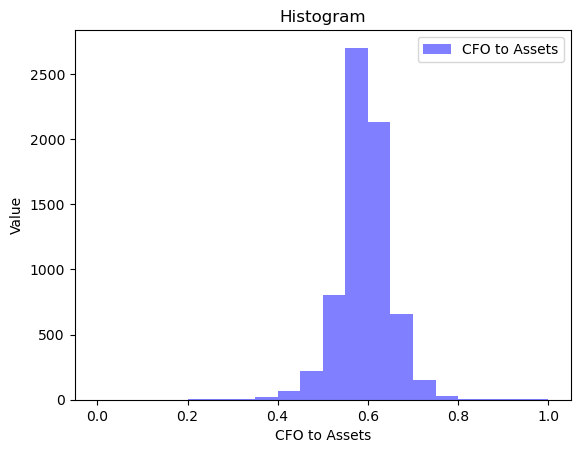

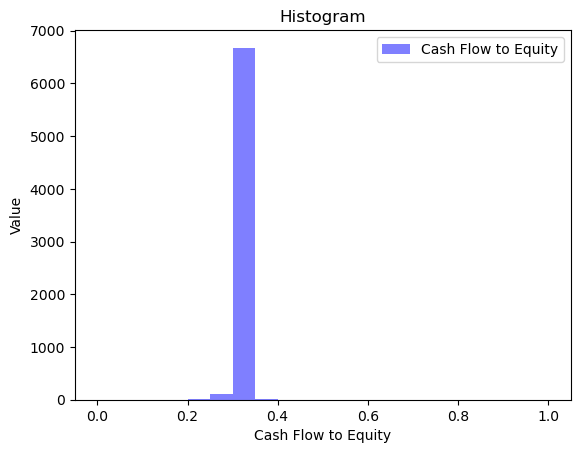

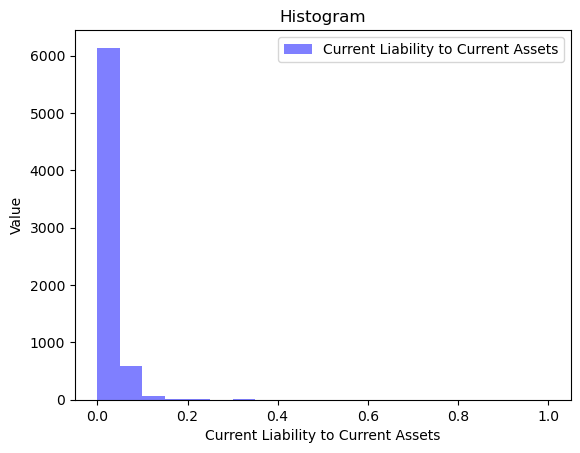

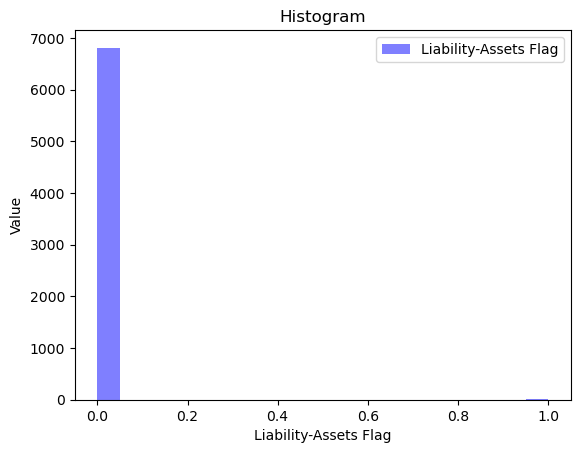

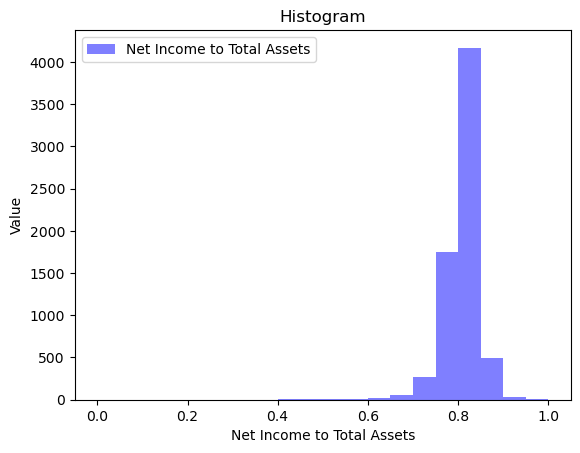

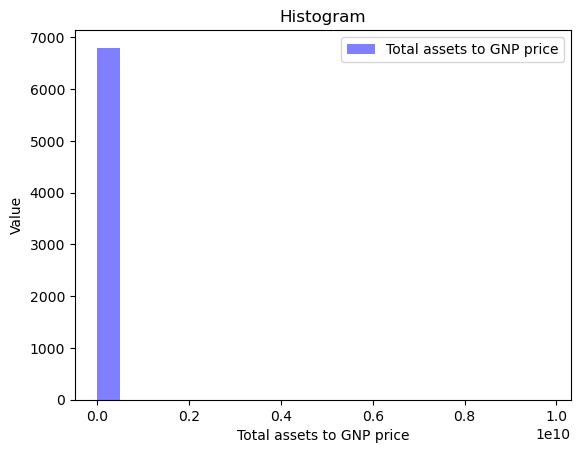

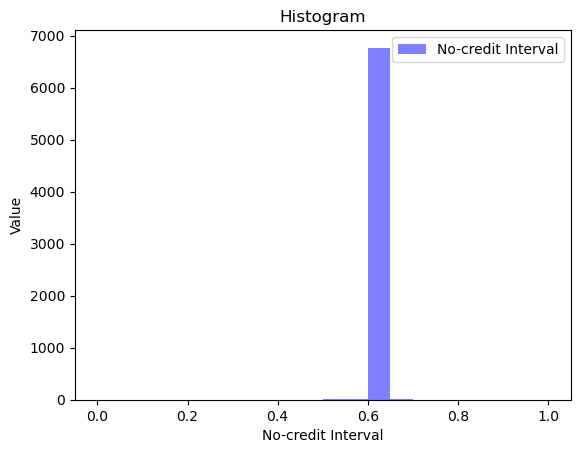

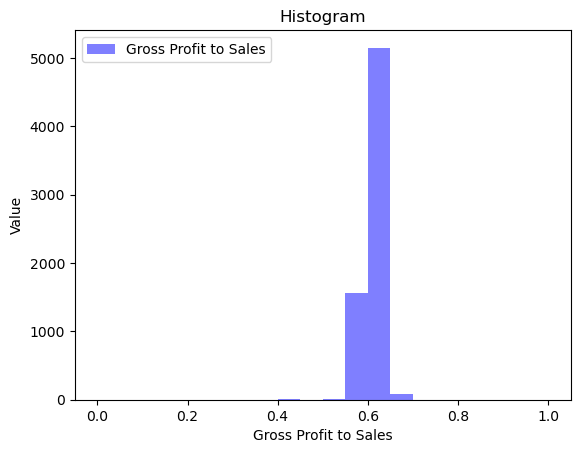

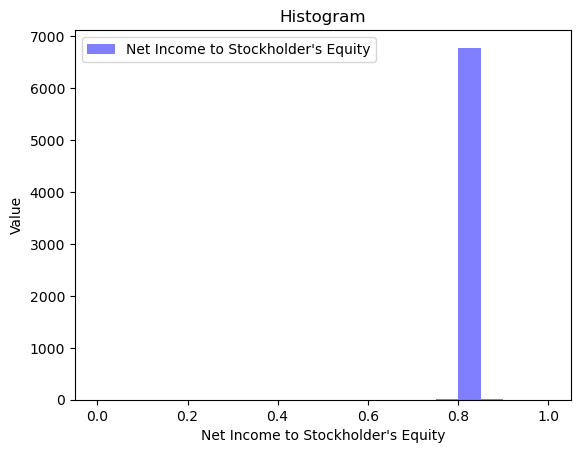

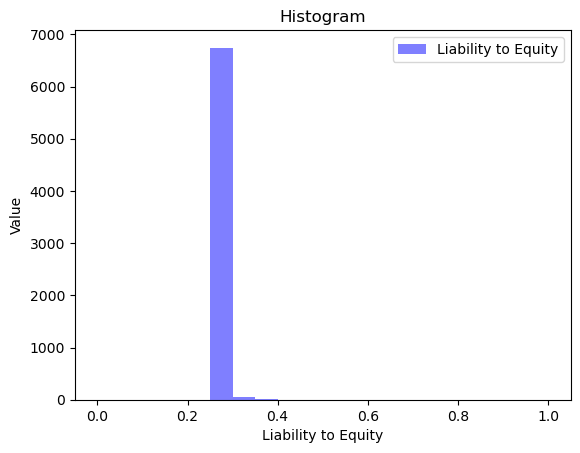

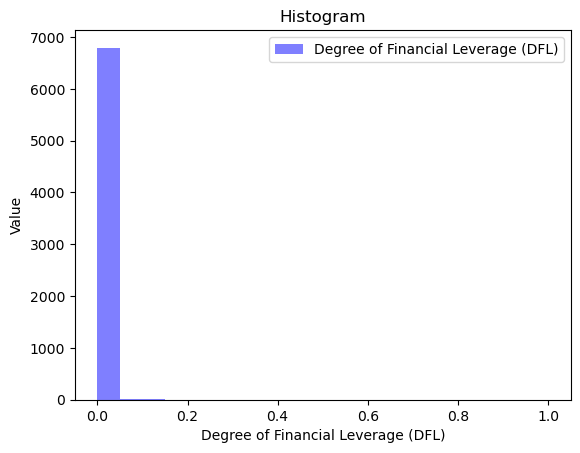

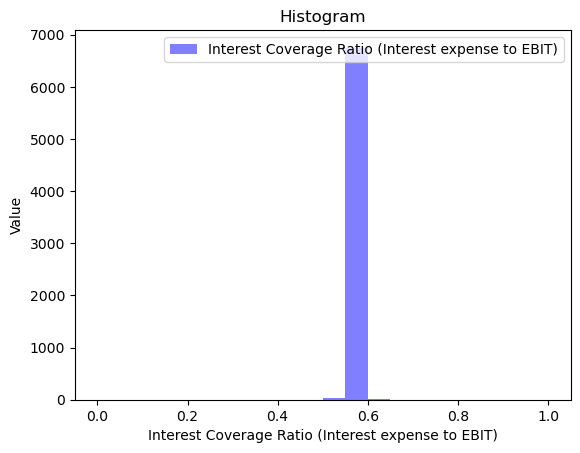

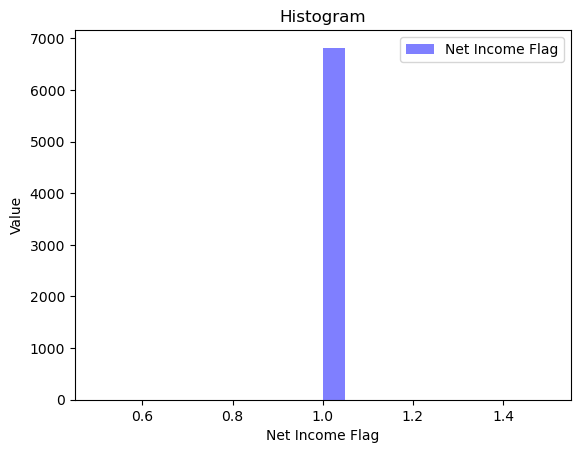

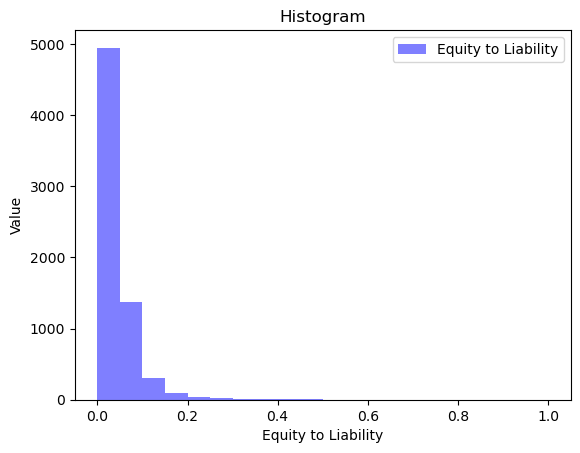

In [12]:
plt.figure()
for i in dataset:
    plt.hist(dataset[i], color = "blue", bins = 20, label = '{}'.format(dataset[i].name), alpha = 0.5)
    plt.title("Histogram")
    plt.xlabel("{}".format(dataset[i].name))
    plt.ylabel("Value")
    plt.legend()
    plt.show()

In [13]:
#Outlier Treatment
for column in dataset:
    dataset[dataset[column] < dataset[column].quantile(0.7)]

In [14]:
#Min-max Normalization
for columns in dataset:
    dataset[columns] = preprocessing.minmax_scale(dataset[columns])

In [15]:
#Train and Test data decleration
y = dataset['Bankrupt']
x = dataset.drop(['Bankrupt'], axis = 1)

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size = 0.7, random_state = 0)

In [16]:
smote = SMOTE()

train_x_smote, train_y_smote = smote.fit_resample(train_x, train_y)
print('Before Smote: ', Counter(train_y))
print('After Smote: ', Counter(train_y_smote))

Before Smote:  Counter({0.0: 4612, 1.0: 161})
After Smote:  Counter({0.0: 4612, 1.0: 4612})


In [17]:
dataset.describe()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,NetValueGrowthRate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),FixedAssetsTurnoverFrequency,Net Worth Turnover Rate (times),RevenuePerPerson,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,CashCurrentLiability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,FixedAssetstoAssets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.001187,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.997345e-01,1.954336e-01,0.467431,1.661415e-02,0.115001,0.190661,0

In [18]:
#Score Calculation for Feature Selection
BestFeature = SelectKBest(score_func = chi2, k = 95)
fit = BestFeature.fit(x, y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

f_Scores = pd.concat([df_columns,df_scores], axis = 1)
f_Scores.columns = ['Specs', 'Score'] 

print(f_Scores.nlargest(15, 'Score'))

                                                Specs       Score
84                              Liability-Assets Flag  131.996215
58                               CashCurrentLiability   30.067819
75                                FixedAssetstoAssets   29.995449
29                                 NetValueGrowthRate   25.951695
48                       FixedAssetsTurnoverFrequency   22.024311
14                                       Tax rate (A)   13.720307
36                                       Debt ratio %   10.960800
56                                  Cash/Total Assets   10.681405
50                                   RevenuePerPerson    9.799248
59                        Current Liability to Assets    7.193747
86                          Total assets to GNP price    6.508465
83                Current Liability to Current Assets    6.041779
54                          Quick Assets/Total Assets    5.187952
2   ROA(B) before interest and depreciation after tax    3.483747
0   ROA(C)

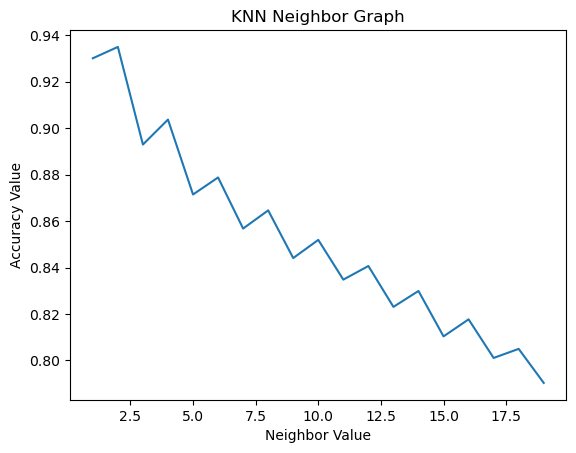

Komşuluk derecesi 2 olduğunda en yüksek başarı oranı %93.49951124144673 olarak bulundu

Komşuluk derecesi 19 olduğunda en düşük başarı oranı %79.03225806451613 olarak bulundu

              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88      1987
         1.0       0.09      0.68      0.16        59

    accuracy                           0.79      2046
   macro avg       0.54      0.74      0.52      2046
weighted avg       0.96      0.79      0.86      2046



In [19]:
#KNN Algorithm With Processed Data
n_neigh = 20
K_best = 0
K_lowest = 0
worstScoreForKNN = 100
accuracyScoreForKNN = 0
scoreList = []
scoreListForKNN = []

for i in range(1, n_neigh):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(train_x_smote, train_y_smote)
    Y_pred = KNN.predict(test_x)
    if KNN.score(test_x, test_y) > accuracyScoreForKNN:
        accuracyScoreForKNN = KNN.score(test_x, test_y)
        K_best = i
    if KNN.score(test_x, test_y) < worstScoreForKNN:
        worstScoreForKNN = KNN.score(test_x, test_y)
        K_lowest = i
        
    scoreList.append(accuracy_score(test_y, Y_pred))
    scoreListForKNN.append(accuracyScoreForKNN)
        
plt.plot(range(1, 20), scoreList)
plt.xlabel("Neighbor Value")
plt.ylabel("Accuracy Value")
plt.title("KNN Neighbor Graph")
plt.show()

print("Komşuluk derecesi {} olduğunda en yüksek başarı oranı %{} olarak bulundu\n".format(K_best, (accuracyScoreForKNN*100)))
print("Komşuluk derecesi {} olduğunda en düşük başarı oranı %{} olarak bulundu\n".format(K_lowest, (worstScoreForKNN*100)))
print(classification_report(test_y, Y_pred))

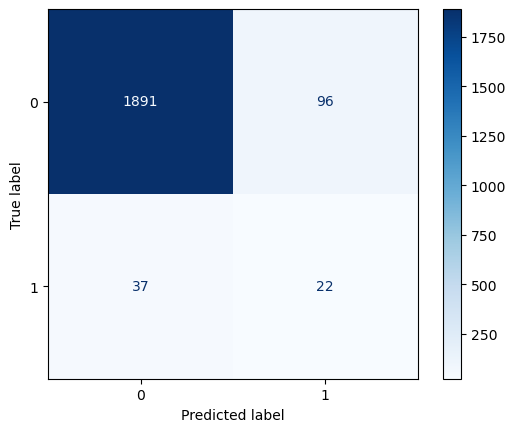

In [20]:
#Confusion Matrix for KNN
BestKNN = KNeighborsClassifier(n_neighbors = K_best)
BestKNN.fit(train_x_smote, train_y_smote)
Y_pred = BestKNN.predict(test_x)
    
plot_confusion_matrix(BestKNN, test_x, test_y, labels = [0,1],cmap = 'Blues')

In [21]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors = K_best)
x = dataset
y = dataset.Bankrupt

nbstratifiedKNN = []
def training(train, test, fold_no):
  x_train = train.drop(['Bankrupt'],axis=1)
  y_train = train.Bankrupt
  x_test = test.drop(['Bankrupt'],axis=1)
  y_test = test.Bankrupt
  smote = SMOTE()
  train_x_smote, train_y_smote = smote.fit_resample(x_train, y_train)
  model.fit(train_x_smote, train_y_smote)
  score = model.score(x_test, y_test)
  nbstratifiedKNN.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(x, y):
    folds = []
    train = dataset.iloc[train_index,:]
    test = dataset.iloc[test_index,:]
    training(train, test, fold_no)
    fold_no += 1
    
print('Ortalama : ', np.mean(nbstratifiedKNN))

For Fold 1 the accuracy is 0.8680351906158358
For Fold 2 the accuracy is 0.9178885630498533
For Fold 3 the accuracy is 0.9134897360703812
For Fold 4 the accuracy is 0.8504398826979472
For Fold 5 the accuracy is 0.9208211143695014
For Fold 6 the accuracy is 0.9486803519061584
For Fold 7 the accuracy is 0.9516129032258065
For Fold 8 the accuracy is 0.9384164222873901
For Fold 9 the accuracy is 0.9633431085043989
For Fold 10 the accuracy is 0.933920704845815
Ortalama :  0.9206647977573088


In [22]:
#SVM Algorithm with Processed Data
svm = SVC()
scoreListForSVM = []
svm.fit(train_x_smote, train_y_smote)
y_pred_SV = svm.predict(test_x)
accuracyScoreForSVM = svm.score(test_x, test_y)

scoreListForSVM.append(accuracyScoreForSVM)

print('SVM başarı oranı: %{}\n'.format(accuracyScoreForSVM*100))
print(classification_report(test_y, y_pred_SV))

SVM başarı oranı: %89.14956011730204

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      1987
         1.0       0.17      0.69      0.27        59

    accuracy                           0.89      2046
   macro avg       0.58      0.80      0.61      2046
weighted avg       0.97      0.89      0.92      2046



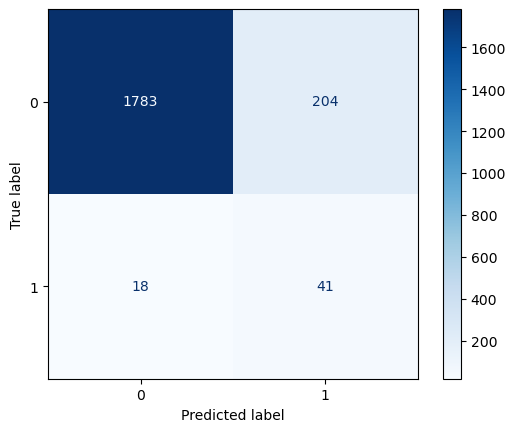

In [23]:
#Confusion Matrix for SVM
plot_confusion_matrix(svm, test_x, test_y, labels = [0,1],cmap = 'Blues')

In [24]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
model = SVC()
x = dataset
y = dataset.Bankrupt

nbstratifiedSVM = []
def training(train, test, fold_no):
  x_train = train.drop(['Bankrupt'],axis=1)
  y_train = train.Bankrupt
  x_test = test.drop(['Bankrupt'],axis=1)
  y_test = test.Bankrupt
  smote = SMOTE()
  train_x_smote, train_y_smote = smote.fit_resample(x_train, y_train)
  model.fit(train_x_smote, train_y_smote)
  score = model.score(x_test, y_test)
  nbstratifiedSVM.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no), score))

fold_no = 1
for train_index,test_index in skf.split(x, y):
    folds = []
    train = dataset.iloc[train_index,:]
    test = dataset.iloc[test_index,:]
    training(train, test, fold_no)
    fold_no += 1
    
print('Ortalama : ', np.mean(nbstratifiedSVM))

For Fold 1 the accuracy is 0.8167155425219942
For Fold 2 the accuracy is 0.8475073313782991
For Fold 3 the accuracy is 0.8064516129032258
For Fold 4 the accuracy is 0.7375366568914956
For Fold 5 the accuracy is 0.8944281524926686
For Fold 6 the accuracy is 0.9252199413489736
For Fold 7 the accuracy is 0.8929618768328446
For Fold 8 the accuracy is 0.9017595307917888
For Fold 9 the accuracy is 0.9384164222873901
For Fold 10 the accuracy is 0.9192364170337739
Ortalama :  0.8680233484482454


In [25]:
#Logistic Regression Algorithm with Processed Data
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
bestSolver = ''
solver = ''
scoreListForLR = []
bestScoreLR = 0

for i in solvers:
    LogReg = LogisticRegression(solver = i)
    LogReg.fit(train_x_smote, train_y_smote)
    Y_pred_LR = LogReg.predict(test_x)
    accuracyScoreForLR = LogReg.score(test_x, test_y)
    solver = i
    print('çözücü {}, ve %{} başarı oranına sahip.\n'.format(solver, accuracyScoreForLR*100))
    if accuracyScoreForLR > bestScoreLR:
        bestScoreLR = accuracyScoreForLR
        bestSolver = i
    
scoreListForLR.append(bestScoreLR)
        
print('Lojistik Regresyon için en iyi çözücü {}, ve %{} başarı oranına sahip.'.format(bestSolver, bestScoreLR*100))
print(classification_report(test_y, Y_pred_LR))

çözücü newton-cg, ve %88.17204301075269 başarı oranına sahip.

çözücü lbfgs, ve %88.12316715542522 başarı oranına sahip.

çözücü liblinear, ve %88.12316715542522 başarı oranına sahip.

çözücü sag, ve %88.17204301075269 başarı oranına sahip.

çözücü saga, ve %88.26979472140762 başarı oranına sahip.

Lojistik Regresyon için en iyi çözücü saga, ve %88.26979472140762 başarı oranına sahip.
              precision    recall  f1-score   support

         0.0       0.99      0.88      0.94      1987
         1.0       0.17      0.81      0.29        59

    accuracy                           0.88      2046
   macro avg       0.58      0.85      0.61      2046
weighted avg       0.97      0.88      0.92      2046



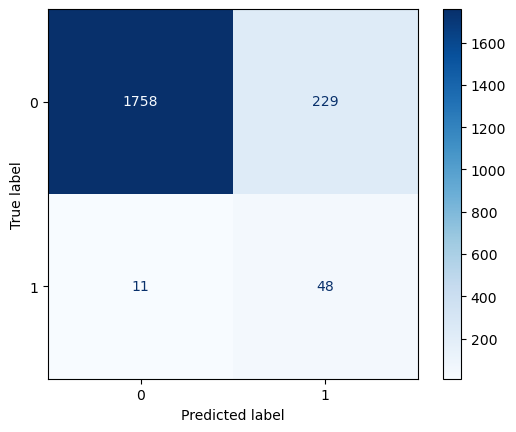

In [26]:
#Confusion Matrix for LR
plot_confusion_matrix(LogReg, test_x, test_y, labels = [0,1],cmap = 'Blues')

In [27]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
model = LogisticRegression(solver = 'sag')
x = dataset
y = dataset.Bankrupt

nbstratifiedLR = []
def training(train, test, fold_no):
  x_train = train.drop(['Bankrupt'], axis=1)
  y_train = train.Bankrupt
  x_test = test.drop(['Bankrupt'], axis=1)
  y_test = test.Bankrupt
  smote = SMOTE()
  train_x_smote, train_y_smote = smote.fit_resample(x_train, y_train)
  model.fit(train_x_smote, train_y_smote)
  score = model.score(x_test, y_test)
  nbstratifiedLR.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no), score))

fold_no = 1
for train_index,test_index in skf.split(x, y):
    folds = []
    train = dataset.iloc[train_index,:]
    test = dataset.iloc[test_index,:]
    training(train, test, fold_no)
    fold_no += 1
    
print('Ortalama : ', np.mean(nbstratifiedLR))

For Fold 1 the accuracy is 0.8372434017595308
For Fold 2 the accuracy is 0.8299120234604106
For Fold 3 the accuracy is 0.8079178885630498
For Fold 4 the accuracy is 0.6642228739002932
For Fold 5 the accuracy is 0.8856304985337243
For Fold 6 the accuracy is 0.9222873900293255
For Fold 7 the accuracy is 0.8900293255131965
For Fold 8 the accuracy is 0.8885630498533724
For Fold 9 the accuracy is 0.9325513196480938
For Fold 10 the accuracy is 0.9060205580029369
Ortalama :  0.8564378329263935


In [28]:
#Neural Network Algorithm with Processed Data
scoreListForNN = []

neuralNet = MLPClassifier(hidden_layer_sizes = (10, 10, 10, 10), max_iter = 10000)
neuralNet.fit(train_x, train_y.values.ravel())
Y_pred_NN = neuralNet.predict(test_x)
accScoreForNN = neuralNet.score(test_x, test_y)

scoreListForNN.append(accScoreForNN)

print('Multi-layer Perceptron %{} başarı oranına sahip.'.format(accScoreForNN*100))
print(classification_report(test_y, Y_pred_NN))

Multi-layer Perceptron %96.96969696969697 başarı oranına sahip.
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1987
         1.0       0.43      0.17      0.24        59

    accuracy                           0.97      2046
   macro avg       0.71      0.58      0.61      2046
weighted avg       0.96      0.97      0.96      2046



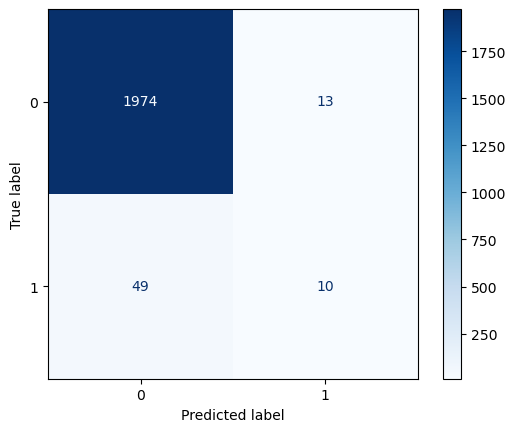

In [29]:
#Confusion Matrix for NN
plot_confusion_matrix(neuralNet, test_x, test_y, labels = [0,1],cmap = 'Blues')

In [30]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
model = MLPClassifier(hidden_layer_sizes = (10, 10, 10, 10), max_iter = 10000)
x = dataset
y = dataset.Bankrupt

nbstratifiedNN = []
def training(train, test, fold_no):
  x_train = train.drop(['Bankrupt'],axis=1)
  y_train = train.Bankrupt
  x_test = test.drop(['Bankrupt'],axis=1)
  y_test = test.Bankrupt
  smote = SMOTE()
  train_x_smote, train_y_smote = smote.fit_resample(x_train, y_train)
  model.fit(train_x_smote, train_y_smote)
  score = model.score(x_test, y_test)
  nbstratifiedNN.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(x, y):
    folds = []
    train = dataset.iloc[train_index,:]
    test = dataset.iloc[test_index,:]
    training(train, test, fold_no)
    fold_no += 1
    
print('Ortalama : ', np.mean(nbstratifiedNN))

For Fold 1 the accuracy is 0.8372434017595308
For Fold 2 the accuracy is 0.8841642228739003
For Fold 3 the accuracy is 0.8680351906158358
For Fold 4 the accuracy is 0.6979472140762464
For Fold 5 the accuracy is 0.9017595307917888
For Fold 6 the accuracy is 0.9340175953079178
For Fold 7 the accuracy is 0.9134897360703812
For Fold 8 the accuracy is 0.8885630498533724
For Fold 9 the accuracy is 0.9252199413489736
For Fold 10 the accuracy is 0.9060205580029369
Ortalama :  0.8756460440700883


In [31]:
#Random Forest Algorithm with Processed Data
randomForest = RandomForestClassifier()
scoreListForRF = []
randomForest.fit(train_x_smote, train_y_smote)
y_pred_RF = randomForest.predict(test_x)
accuracyScoreForRF = accuracy_score(test_y, y_pred_RF)

scoreListForRF.append(accuracyScoreForRF)

print("Random Forest Başarı oranı: %", accuracyScoreForRF*100)
print(classification_report(test_y, y_pred_RF))

Random Forest Başarı oranı: % 94.86803519061584
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      1987
         1.0       0.25      0.39      0.30        59

    accuracy                           0.95      2046
   macro avg       0.62      0.68      0.64      2046
weighted avg       0.96      0.95      0.95      2046



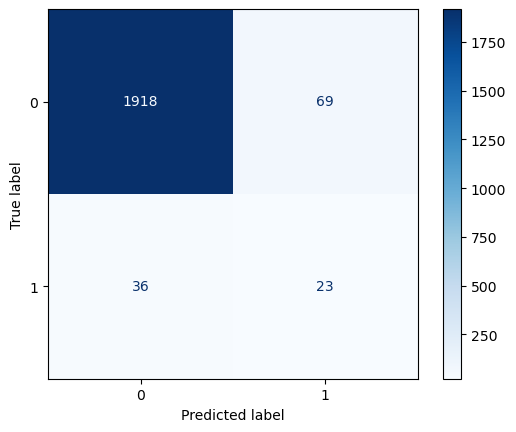

In [32]:
#Confusion Matrix for RF
plot_confusion_matrix(randomForest, test_x, test_y, labels = [0,1],cmap = 'Blues')

In [33]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
model = RandomForestClassifier()
x = dataset
y = dataset.Bankrupt

nbstratifiedRF = []
def training(train, test, fold_no):
  x_train = train.drop(['Bankrupt'],axis=1)
  y_train = train.Bankrupt
  x_test = test.drop(['Bankrupt'],axis=1)
  y_test = test.Bankrupt
  smote = SMOTE()
  train_x_smote, train_y_smote = smote.fit_resample(x_train, y_train)
  model.fit(train_x_smote, train_y_smote)
  score = model.score(x_test, y_test)
  nbstratifiedRF.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(x, y):
    folds = []
    train = dataset.iloc[train_index,:]
    test = dataset.iloc[test_index,:]
    training(train, test, fold_no)
    fold_no += 1
    
print('Ortalama : ', np.mean(nbstratifiedRF))

For Fold 1 the accuracy is 0.9486803519061584
For Fold 2 the accuracy is 0.9325513196480938
For Fold 3 the accuracy is 0.9222873900293255
For Fold 4 the accuracy is 0.9222873900293255
For Fold 5 the accuracy is 0.9560117302052786
For Fold 6 the accuracy is 0.9604105571847508
For Fold 7 the accuracy is 0.9589442815249267
For Fold 8 the accuracy is 0.9618768328445748
For Fold 9 the accuracy is 0.9648093841642229
For Fold 10 the accuracy is 0.9662261380323054
Ortalama :  0.9494085375568961


In [34]:
#Bernoulli Naive Bayes Algorithm with Processed Data
bernoulliNB = BernoulliNB()
scoreListForNB = []
bernoulliNB.fit(train_x_smote, train_y_smote)
y_pred_NB = bernoulliNB.predict(test_x)
accuracyScoreForNB = accuracy_score(test_y, y_pred_NB)

scoreListForNB.append(accuracyScoreForNB)

print("Naive Bayes başarı oranı: %", accuracyScoreForNB*100)
print(classification_report(test_y, y_pred_NB))

Naive Bayes başarı oranı: % 77.71260997067448
              precision    recall  f1-score   support

         0.0       0.99      0.78      0.87      1987
         1.0       0.08      0.61      0.14        59

    accuracy                           0.78      2046
   macro avg       0.53      0.70      0.50      2046
weighted avg       0.96      0.78      0.85      2046



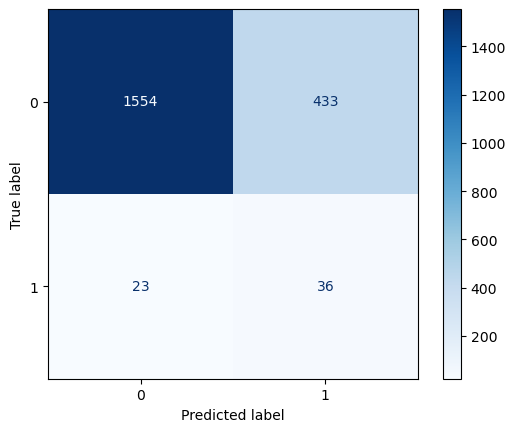

In [35]:
#Confusion Matrix for NB
plot_confusion_matrix(bernoulliNB, test_x, test_y, labels = [0,1],cmap = 'Blues')

In [36]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
model = BernoulliNB()
x = dataset
y = dataset.Bankrupt

nbstratifiedNB = []
def training(train, test, fold_no):
  x_train = train.drop(['Bankrupt'],axis=1)
  y_train = train.Bankrupt
  x_test = test.drop(['Bankrupt'],axis=1)
  y_test = test.Bankrupt
  smote = SMOTE()
  train_x_smote, train_y_smote = smote.fit_resample(x_train, y_train)
  model.fit(train_x_smote, train_y_smote)
  score = model.score(x_test, y_test)
  nbstratifiedNB.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(x, y):
    folds = []
    train = dataset.iloc[train_index,:]
    test = dataset.iloc[test_index,:]
    training(train, test, fold_no)
    fold_no += 1
    
print('Ortalama : ', np.mean(nbstratifiedNB))

For Fold 1 the accuracy is 0.6876832844574781
For Fold 2 the accuracy is 0.7771260997067448
For Fold 3 the accuracy is 0.6451612903225806
For Fold 4 the accuracy is 0.8284457478005866
For Fold 5 the accuracy is 0.781524926686217
For Fold 6 the accuracy is 0.8284457478005866
For Fold 7 the accuracy is 0.7551319648093842
For Fold 8 the accuracy is 0.7448680351906158
For Fold 9 the accuracy is 0.8328445747800587
For Fold 10 the accuracy is 0.8370044052863436
Ortalama :  0.7718236076840597


In [37]:
#Bernoulli Naive Bayes Algorithm with Processed Data
scoreListForDT = []
dTree = DecisionTreeClassifier()
dTree.fit(train_x_smote, train_y_smote)
y_pred_DT = dTree.predict(test_x)
accuracyScoreForDT = dTree.score(test_x, test_y)

scoreListForDT.append(accuracyScoreForDT)

print('Decision Tree başarı oranı: %{}\n'.format(accuracyScoreForDT*100))
print(classification_report(test_y, y_pred_DT))

Decision Tree başarı oranı: %93.841642228739

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      1987
         1.0       0.21      0.41      0.28        59

    accuracy                           0.94      2046
   macro avg       0.60      0.68      0.62      2046
weighted avg       0.96      0.94      0.95      2046



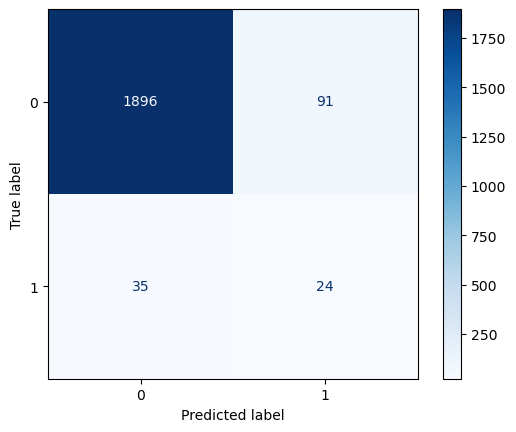

In [38]:
#Confusion Matrix for DT
plot_confusion_matrix(dTree, test_x, test_y, labels = [0,1],cmap = 'Blues')

In [39]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
model = DecisionTreeClassifier()
x = dataset
y = dataset.Bankrupt

nbstratifiedDT = []
def training(train, test, fold_no):
  x_train = train.drop(['Bankrupt'],axis=1)
  y_train = train.Bankrupt
  x_test = test.drop(['Bankrupt'],axis=1)
  y_test = test.Bankrupt
  smote = SMOTE()
  train_x_smote, train_y_smote = smote.fit_resample(x_train, y_train)
  model.fit(train_x_smote, train_y_smote)
  score = model.score(x_test, y_test)
  nbstratifiedDT.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(x, y):
    folds = []
    train = dataset.iloc[train_index,:]
    test = dataset.iloc[test_index,:]
    training(train, test, fold_no)
    fold_no += 1
    
print('Ortalama : ', np.mean(nbstratifiedDT))

For Fold 1 the accuracy is 0.9237536656891495
For Fold 2 the accuracy is 0.907624633431085
For Fold 3 the accuracy is 0.8958944281524927
For Fold 4 the accuracy is 0.8709677419354839
For Fold 5 the accuracy is 0.9266862170087976
For Fold 6 the accuracy is 0.9457478005865103
For Fold 7 the accuracy is 0.9486803519061584
For Fold 8 the accuracy is 0.9325513196480938
For Fold 9 the accuracy is 0.9530791788856305
For Fold 10 the accuracy is 0.947136563876652
Ortalama :  0.9252121901120054


In [40]:
#Declare Train and Test Data with Feature Selection
b = dataset['Bankrupt']
a = dataset[['CashCurrentLiability', 'FixedAssetstoAssets', 'NetValueGrowthRate', 'FixedAssetsTurnoverFrequency', 'RevenuePerPerson',
             'Total assets to GNP price', 'Total assets to GNP price', 'Quick Ratio', 'Quick Asset Turnover Rate', 'Total Asset Growth Rate',
             'Research and development expense rate', 'Cash Turnover Rate', 'Total debt/Total net worth', 'Current Asset Turnover Rate',
             'Interest-bearing debt interest rate', 'Average Collection Days']]

train_a, test_a, train_b, test_b = train_test_split(a, b, train_size = 0.7, random_state = 0)

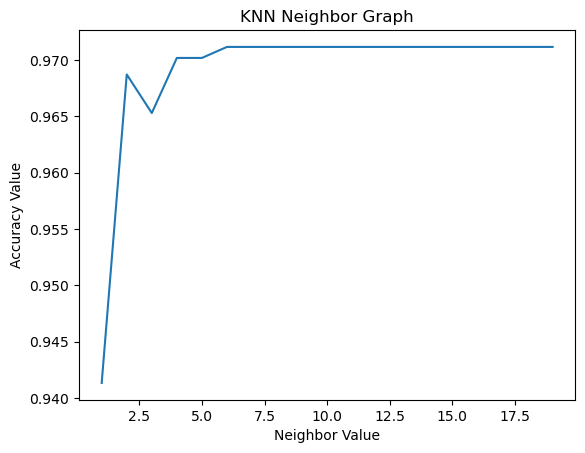

Komşuluk derecesi 6 olduğunda en yüksek başarı oranı %97.11632453567938 olarak bulundu

Komşuluk derecesi 1 olduğunda en düşük başarı oranı %94.13489736070382 olarak bulundu

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1987
         1.0       0.00      0.00      0.00        59

    accuracy                           0.97      2046
   macro avg       0.49      0.50      0.49      2046
weighted avg       0.94      0.97      0.96      2046



In [41]:
#KNN Algorithm with Feature Selection
n_neigh = 20
K_best1 = 0
K_lowest1 = 0
accuracyScoreForKNN1 = 0
worstScoreForKNN1 = 100
scoreList1 = []

for i in range(1, n_neigh):
    KNNForSelection = KNeighborsClassifier(n_neighbors = i)
    KNNForSelection.fit(train_a, train_b)
    Y_pred1 = KNNForSelection.predict(test_a)
    if KNNForSelection.score(test_a, test_b) > accuracyScoreForKNN1:
        accuracyScoreForKNN1 = KNNForSelection.score(test_a, test_b)
        K_best1 = i
    if KNNForSelection.score(test_a, test_b) < worstScoreForKNN1:
        worstScoreForKNN1 = KNNForSelection.score(test_a, test_b)
        K_lowest1 = i
        
    scoreList1.append(accuracy_score(test_b, Y_pred1))
    scoreListForKNN.append(accuracyScoreForKNN1)
              
plt.plot(range(1, 20), scoreList1)
plt.xlabel("Neighbor Value")
plt.ylabel("Accuracy Value")
plt.title("KNN Neighbor Graph")
plt.show()
        
print("Komşuluk derecesi {} olduğunda en yüksek başarı oranı %{} olarak bulundu\n".format(K_best1, (accuracyScoreForKNN1*100)))
print("Komşuluk derecesi {} olduğunda en düşük başarı oranı %{} olarak bulundu\n".format(K_lowest1, (worstScoreForKNN1*100)))
print(classification_report(test_b, Y_pred1))

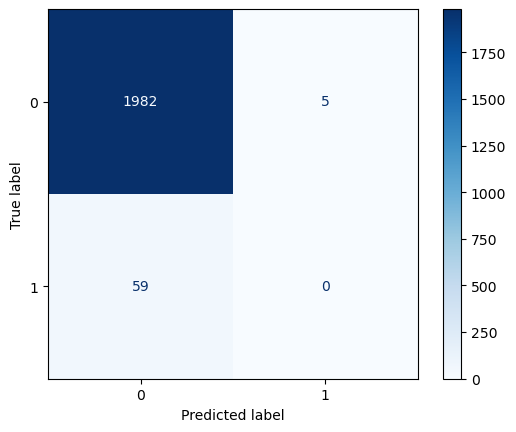

In [42]:
#Confusion Matrix for KNN
BestKNNForSelection = KNeighborsClassifier(n_neighbors = K_best)
BestKNNForSelection.fit(train_a, train_b)
BestKNNForSelection.predict(test_a)
    
plot_confusion_matrix(BestKNNForSelection, test_a, test_b, labels = [0,1], cmap = 'Blues')

Cross Validation Scores -> [0.96861925 0.96861925 0.96443515 0.96436059 0.96645702 0.95807128
 0.96855346 0.96645702 0.96645702 0.96436059]

Cross Validation Mean ->  0.9656390621299439


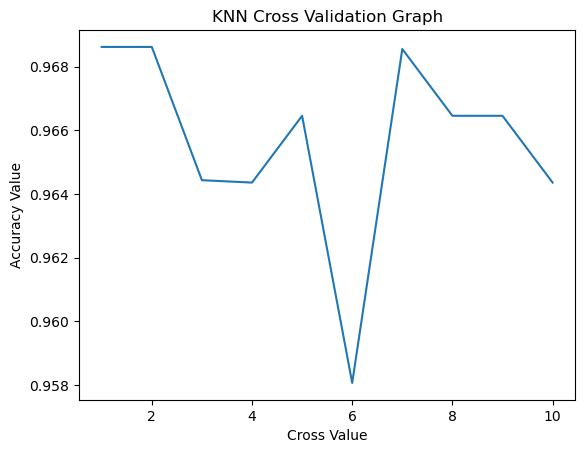

In [43]:
#Cross Validation for KNN
scores_knn1 = cross_val_score(BestKNNForSelection, train_a, train_b, cv = 10, scoring = 'accuracy')
print('Cross Validation Scores -> {}\n'.format(scores_knn1))
print('Cross Validation Mean -> ', scores_knn1.mean())

plt.plot(range(1, 11), scores_knn1)
plt.xlabel("Cross Value")
plt.ylabel("Accuracy Value")
plt.title("KNN Cross Validation Graph")
plt.show()

In [44]:
#SVM Algorithm with Feature Selection
svmForSelection = SVC()
svmForSelection.fit(train_a, train_b)
y_pred_SV1 = svmForSelection.predict(test_a)
accuracyScoreForSVM1 = svmForSelection.score(test_a, test_b)

scoreListForSVM.append(accuracyScoreForSVM1)
    
print('SVM başarı oranı: %', accuracyScoreForSVM1*100)
print(classification_report(test_b, y_pred_SV1))

SVM başarı oranı: % 97.11632453567938
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1987
         1.0       0.00      0.00      0.00        59

    accuracy                           0.97      2046
   macro avg       0.49      0.50      0.49      2046
weighted avg       0.94      0.97      0.96      2046



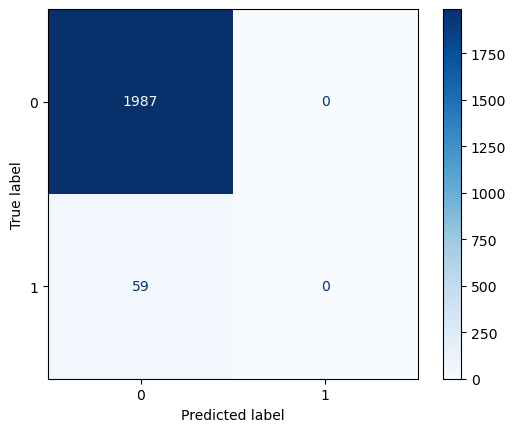

In [45]:
#Confusion Matrix for SVM
plot_confusion_matrix(svmForSelection, test_a, test_b, labels = [0,1], cmap = 'Blues')

Cross Validation Scores -> [0.9665272  0.9665272  0.96443515 0.96645702 0.96645702 0.96645702
 0.96645702 0.96645702 0.96645702 0.96645702]

Cross Validation Mean ->  0.9662688701174529


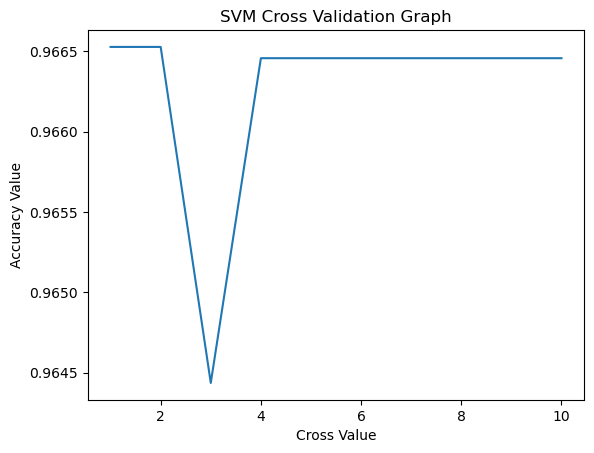

In [46]:
#Cross Validation for SVM
scores_svm1 = cross_val_score(svmForSelection, train_a, train_b, cv = 10, scoring = 'accuracy')
print('Cross Validation Scores -> {}\n'.format(scores_svm1))
print('Cross Validation Mean -> ', scores_svm1.mean())

plt.plot(range(1, 11), scores_svm1)
plt.xlabel("Cross Value")
plt.ylabel("Accuracy Value")
plt.title("SVM Cross Validation Graph")
plt.show()

In [47]:
#Logistic Regression Algorithm with Feature Selection
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
bestSolver1 = ''
solver1 = ''
bestScoreLR1 = 0

for i in solvers:
    LogRegForSelection = LogisticRegression(solver = i)
    LogRegForSelection.fit(train_a, train_b)
    Y_pred_LR1 = LogRegForSelection.predict(test_a)
    accuracyScoreForLR1 = LogRegForSelection.score(test_a, test_b)
    solver1 = i
    print('çözücü {}, ve %{} başarı oranına sahip.\n'.format(solver1, accuracyScoreForLR1*100))
    if accuracyScoreForLR1 > bestScoreLR1:
        bestScoreLR1 = accuracyScoreForLR1
        bestSolver1 = i
    
scoreListForLR.append(bestScoreLR1)
        
print('Lojistik Regresyon için en iyi çözücü {}, ve %{} başarı oranına sahip.'.format(bestSolver1, bestScoreLR1*100))
print(classification_report(test_b, Y_pred_LR1))

çözücü newton-cg, ve %97.11632453567938 başarı oranına sahip.

çözücü lbfgs, ve %97.11632453567938 başarı oranına sahip.

çözücü liblinear, ve %97.11632453567938 başarı oranına sahip.

çözücü sag, ve %97.11632453567938 başarı oranına sahip.

çözücü saga, ve %97.11632453567938 başarı oranına sahip.

Lojistik Regresyon için en iyi çözücü newton-cg, ve %97.11632453567938 başarı oranına sahip.
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1987
         1.0       0.00      0.00      0.00        59

    accuracy                           0.97      2046
   macro avg       0.49      0.50      0.49      2046
weighted avg       0.94      0.97      0.96      2046



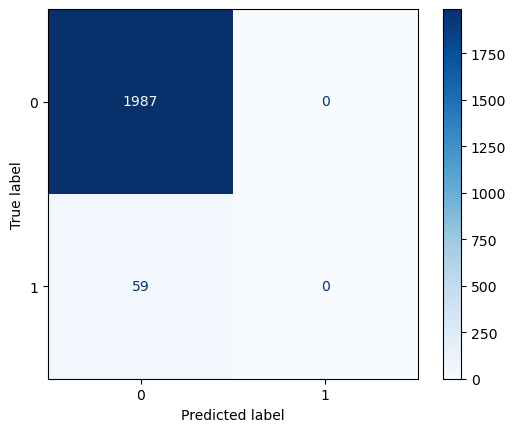

In [48]:
#Confusion Matrix for LR
plot_confusion_matrix(LogRegForSelection, test_a, test_b, labels = [0,1],cmap = 'Blues')

Cross Validation Scores -> [0.9665272  0.9665272  0.96443515 0.96645702 0.96645702 0.96645702
 0.96645702 0.96645702 0.96645702 0.96645702]

Cross Validation Mean ->  0.9662688701174529


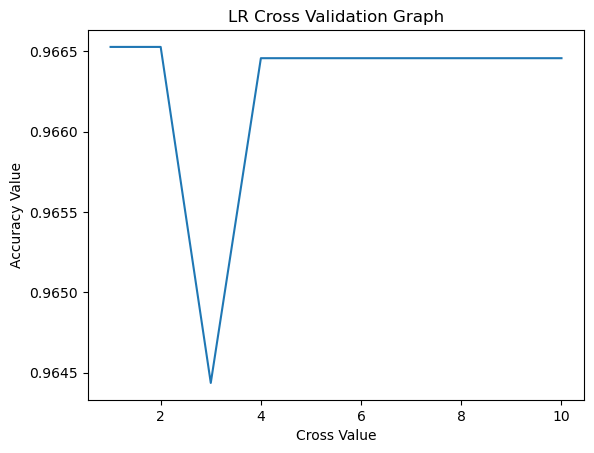

In [49]:
#Cross Validation for LR
scores_lr1 = cross_val_score(LogRegForSelection, train_a, train_b, cv = 10, scoring='accuracy')
print('Cross Validation Scores -> {}\n'.format(scores_lr1))
print('Cross Validation Mean -> ', scores_lr1.mean())

plt.plot(range(1, 11), scores_lr1)
plt.xlabel("Cross Value")
plt.ylabel("Accuracy Value")
plt.title("LR Cross Validation Graph")
plt.show()

In [50]:
#Neural Network Algorithm with Feature Selection
neuralNetForSelection = MLPClassifier(hidden_layer_sizes = (10, 10, 10, 10), max_iter = 10000)
neuralNetForSelection.fit(train_a, train_b.values.ravel())
Y_pred_NN1 = neuralNetForSelection.predict(test_a)
accScoreForNN1 = neuralNetForSelection.score(test_a, test_b)

scoreListForNN.append(accScoreForNN1)

print('Multi-layer Perceptron %{} başarı oranına sahip.'.format(accScoreForNN1*100))
print(classification_report(test_b, Y_pred_NN1))

Multi-layer Perceptron %97.0674486803519 başarı oranına sahip.
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1987
         1.0       0.33      0.02      0.03        59

    accuracy                           0.97      2046
   macro avg       0.65      0.51      0.51      2046
weighted avg       0.95      0.97      0.96      2046



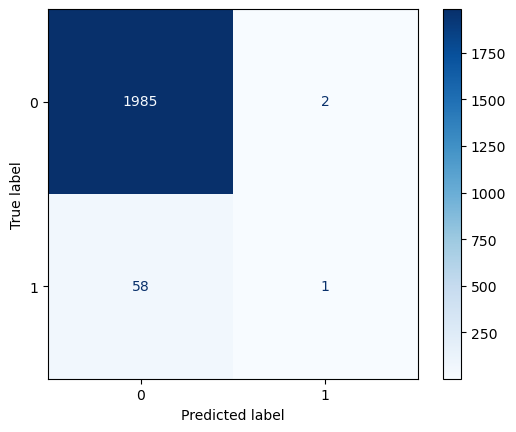

In [51]:
#Confusion Matrix for LR
plot_confusion_matrix(neuralNetForSelection, test_a, test_b, labels = [0,1],cmap = 'Blues')

Cross Validation Scores -> [0.9665272  0.96443515 0.96443515 0.96016771 0.96645702 0.96436059
 0.96645702 0.96436059 0.96436059 0.96645702]

Cross Validation Mean ->  0.9648018034613124


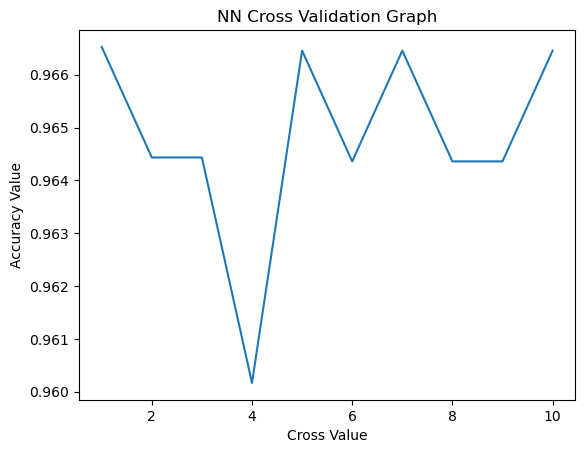

In [52]:
#Cross Validation For NN
scores_nn1 = cross_val_score(neuralNetForSelection, train_a, train_b, cv = 10, scoring='accuracy')
print('Cross Validation Scores -> {}\n'.format(scores_nn1))
print('Cross Validation Mean -> ', scores_nn1.mean())

plt.plot(range(1, 11), scores_nn1)
plt.xlabel("Cross Value")
plt.ylabel("Accuracy Value")
plt.title("NN Cross Validation Graph")
plt.show()

In [53]:
#Random Forest Algorithm with Feature Selection 
randomForestForSelection = RandomForestClassifier()
randomForestForSelection.fit(train_a, train_b)
y_pred_RF1 = randomForestForSelection.predict(test_a)
accuracyScoreForRF1 = accuracy_score(test_b, y_pred_RF1)

scoreListForRF.append(accuracyScoreForRF1)

print("Random Forest Başarı oranı: %", accuracyScoreForRF1*100)
print(classification_report(test_b, y_pred_RF1))

Random Forest Başarı oranı: % 96.9208211143695
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1987
         1.0       0.00      0.00      0.00        59

    accuracy                           0.97      2046
   macro avg       0.49      0.50      0.49      2046
weighted avg       0.94      0.97      0.96      2046



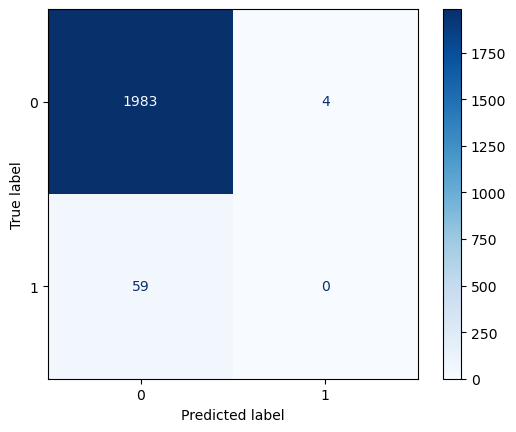

In [54]:
#Confusion Matrix for RF
plot_confusion_matrix(randomForestForSelection, test_a, test_b, labels = [0,1],cmap = 'Blues')

Cross Validation Scores -> [0.9665272  0.9665272  0.96861925 0.96436059 0.96645702 0.96645702
 0.96855346 0.96645702 0.96645702 0.96436059]

Cross Validation Mean ->  0.9664776365534239


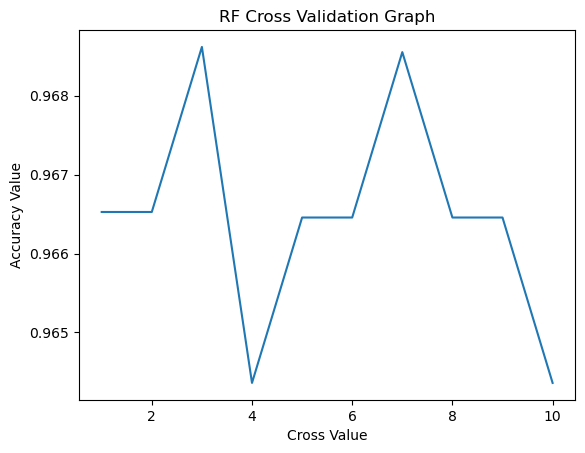

In [55]:
#Cross Validation For RF
scores_rf1 = cross_val_score(randomForestForSelection, train_a, train_b, cv = 10, scoring='accuracy')
print('Cross Validation Scores -> {}\n'.format(scores_rf1))
print('Cross Validation Mean -> ', scores_rf1.mean())

plt.plot(range(1, 11), scores_rf1)
plt.xlabel("Cross Value")
plt.ylabel("Accuracy Value")
plt.title("RF Cross Validation Graph")
plt.show()

In [56]:
#Bernoulli Naive Bayes Algorithm with Feature Selection
bernoulliNBForSelection = BernoulliNB()
bernoulliNBForSelection.fit(train_a, train_b)
y_pred_NB1 = bernoulliNBForSelection.predict(test_a)
accuracyScoreForNB1 = accuracy_score(test_b, y_pred_NB1)

scoreListForNB.append(accuracyScoreForNB1)

print("Naive Bayes başarı oranı: %", accuracyScoreForNB1*100)
print(classification_report(test_b, y_pred_NB1))

Naive Bayes başarı oranı: % 97.0674486803519
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1987
         1.0       0.33      0.02      0.03        59

    accuracy                           0.97      2046
   macro avg       0.65      0.51      0.51      2046
weighted avg       0.95      0.97      0.96      2046



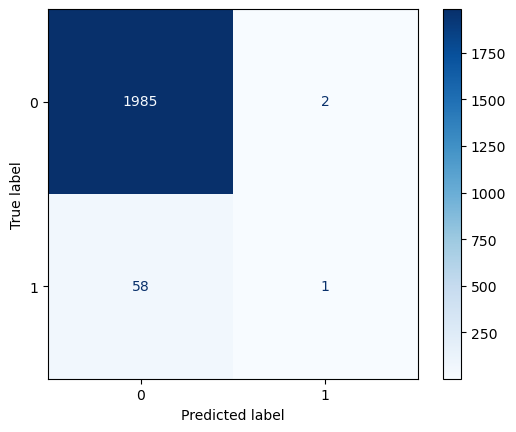

In [57]:
#Confusion Matrix for NB
plot_confusion_matrix(bernoulliNBForSelection, test_a, test_b, labels = [0,1],cmap = 'Blues')

Cross Validation Scores -> [0.96443515 0.96443515 0.96443515 0.96645702 0.96226415 0.96645702
 0.96645702 0.96436059 0.96645702 0.96645702]

Cross Validation Mean ->  0.9652215292580019


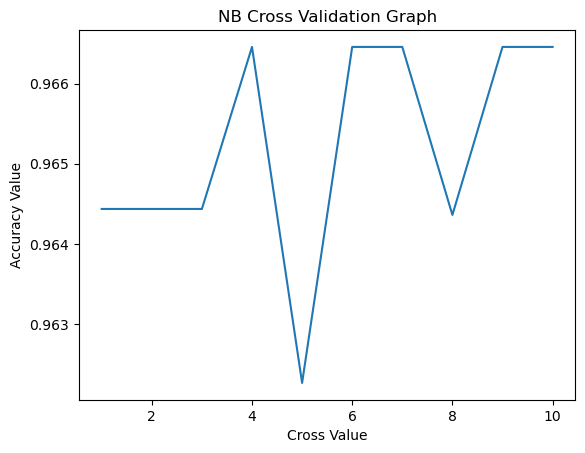

In [58]:
#Cross Validation For NB
scores_nb1 = cross_val_score(bernoulliNBForSelection, train_a, train_b, cv = 10, scoring='accuracy')
print('Cross Validation Scores -> {}\n'.format(scores_nb1))
print('Cross Validation Mean -> ', scores_nb1.mean())

plt.plot(range(1, 11), scores_nb1)
plt.xlabel("Cross Value")
plt.ylabel("Accuracy Value")
plt.title("NB Cross Validation Graph")
plt.show()

In [59]:
#Decision Tree Bayes Algorithm with Processed Data
dTreeForSelection = DecisionTreeClassifier()
dTreeForSelection.fit(train_a, train_b)
y_pred_DT1 = dTreeForSelection.predict(test_a)
accuracyScoreForDT1 = dTreeForSelection.score(test_a, test_b)

scoreListForDT.append(accuracyScoreForDT1)

print('Decision Tree başarı oranı: %{}\n'.format(accuracyScoreForDT1*100))
print(classification_report(test_b, y_pred_DT1))

Decision Tree başarı oranı: %93.40175953079178

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      1987
         1.0       0.09      0.14      0.11        59

    accuracy                           0.93      2046
   macro avg       0.53      0.55      0.54      2046
weighted avg       0.95      0.93      0.94      2046



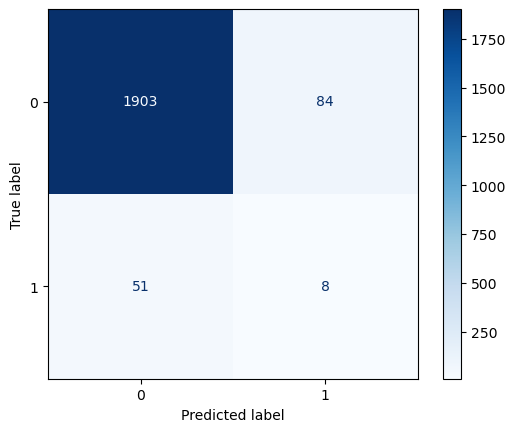

In [60]:
#Confusion Matrix for DT
plot_confusion_matrix(dTreeForSelection, test_a, test_b, labels = [0,1],cmap = 'Blues')

Cross Validation Scores -> [0.93514644 0.92677824 0.94142259 0.93501048 0.94549266 0.93710692
 0.93501048 0.9245283  0.94339623 0.92243187]

Cross Validation Mean ->  0.9346324219538081


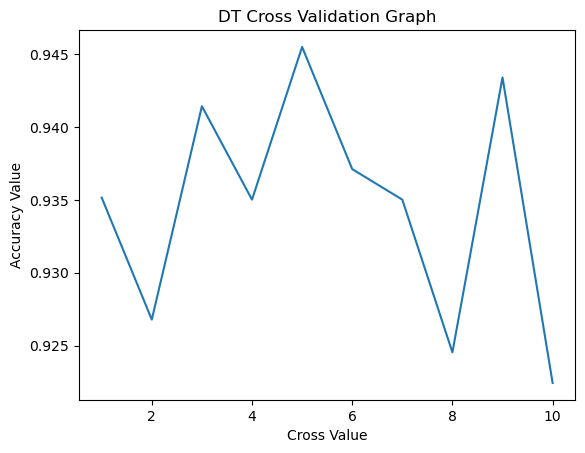

In [61]:
#Cross Validation For DT
scores_dt1 = cross_val_score(dTreeForSelection, train_a, train_b, cv = 10, scoring='accuracy')
print('Cross Validation Scores -> {}\n'.format(scores_dt1))
print('Cross Validation Mean -> ', scores_dt1.mean())

plt.plot(range(1, 11), scores_dt1)
plt.xlabel("Cross Value")
plt.ylabel("Accuracy Value")
plt.title("DT Cross Validation Graph")
plt.show()

In [62]:
#Import Raw Data
datasetRaw = pd.read_csv(r'C:\Users\deep-\Desktop\data.csv')

pd.set_option('display.max_columns', None)
datasetRaw.head()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,NetValueGrowthRate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),FixedAssetsTurnoverFrequency,Net Worth Turnover Rate (times),RevenuePerPerson,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,CashCurrentLiability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,FixedAssetstoAssets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.

In [63]:
#Train and Test data decleration
d = datasetRaw['Bankrupt']
c = datasetRaw.drop(['Bankrupt'], axis = 1)

train_c, test_c, train_d, test_d = train_test_split(c, d, train_size = 0.7, random_state = 0)

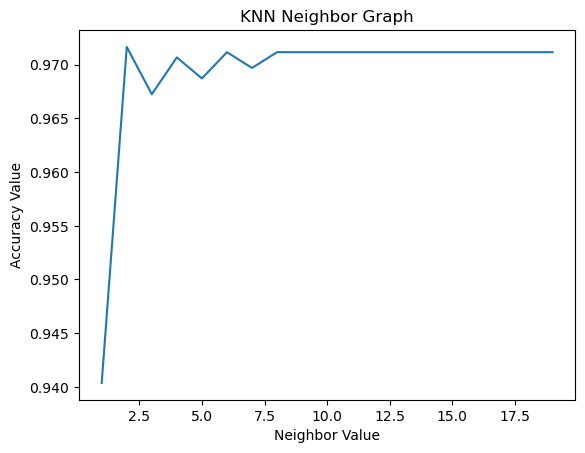

Komşuluk derecesi 2 olduğunda en yüksek başarı oranı %97.16520039100685 olarak bulundu

Komşuluk derecesi 1 olduğunda en düşük başarı oranı %94.03714565004888 olarak bulundu

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1987
           1       0.00      0.00      0.00        59

    accuracy                           0.97      2046
   macro avg       0.49      0.50      0.49      2046
weighted avg       0.94      0.97      0.96      2046



In [64]:
#KNN Algorithm with Raw Data
n_neigh = 20
K_best2 = 0
K_lowest2 = 0
accuracyScoreForKNN2 = 0
worstScoreForKNN2 = 100
scoreList2 = []

for i in range(1, n_neigh):
    KNNForRaw = KNeighborsClassifier(n_neighbors = i)
    trainedData = KNNForRaw.fit(train_c, train_d)
    Y_pred2 = KNNForRaw.predict(test_c)
    if KNNForRaw.score(test_c, test_d) > accuracyScoreForKNN2:
        accuracyScoreForKNN2 = KNNForRaw.score(test_c, test_d)
        K_best2 = i
    if KNNForRaw.score(test_c, test_d) < worstScoreForKNN2:
        worstScoreForKNN2 = KNNForRaw.score(test_c, test_d)
        K_lowest2 = i
        
    scoreList2.append(accuracy_score(test_d, Y_pred2))
    scoreListForKNN.append(accuracyScoreForKNN2)
              
plt.plot(range(1, 20), scoreList2)
plt.xlabel("Neighbor Value")
plt.ylabel("Accuracy Value")
plt.title("KNN Neighbor Graph")
plt.show()
        
print("Komşuluk derecesi {} olduğunda en yüksek başarı oranı %{} olarak bulundu\n".format(K_best2, (accuracyScoreForKNN2*100)))
print("Komşuluk derecesi {} olduğunda en düşük başarı oranı %{} olarak bulundu\n".format(K_lowest2, (worstScoreForKNN2*100)))
print(classification_report(test_d, Y_pred2))

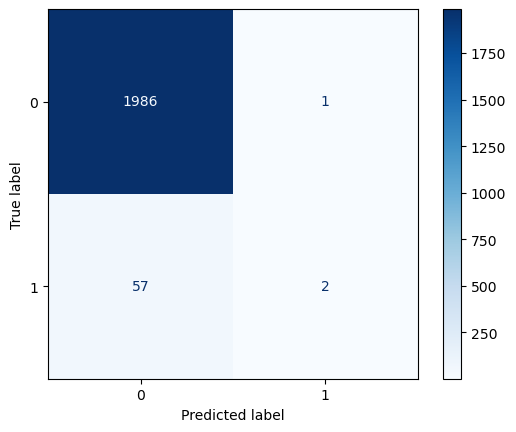

In [65]:
#Confusion Matrix for KNN
BestKNNForRaw = KNeighborsClassifier(n_neighbors = K_best2)
BestKNNForRaw.fit(train_c, train_d)
Y_pred = BestKNNForRaw.predict(test_c)
    
plot_confusion_matrix(BestKNNForRaw, test_c, test_d, labels = [0,1], cmap = 'Blues')

Cross Validation Scores -> [0.96443515 0.9623431  0.9623431  0.96226415 0.96645702 0.96436059
 0.96855346 0.96645702 0.96645702 0.96436059]

Cross Validation Mean ->  0.9648031192161609


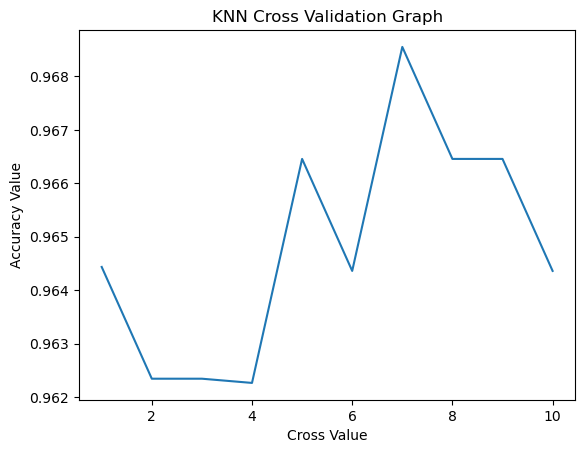

In [66]:
#Cross Validation for KNN
scores_knn2 = cross_val_score(BestKNNForRaw, train_c, train_d, cv = 10, scoring = 'accuracy')
print('Cross Validation Scores -> {}\n'.format(scores_knn2))
print('Cross Validation Mean -> ', scores_knn2.mean())

plt.plot(range(1, 11), scores_knn2)
plt.xlabel("Cross Value")
plt.ylabel("Accuracy Value")
plt.title("KNN Cross Validation Graph")
plt.show()

In [67]:
#SVM Algorithm with Raw Data
svmForRaw = SVC()
svmForRaw.fit(train_c, train_d)
y_pred_SV2 = svmForRaw.predict(test_c)
accuracyScoreForSVM2 = svmForRaw.score(test_c, test_d)

scoreListForSVM.append(accuracyScoreForSVM2)
    
print('SVM başarı oranı: %', accuracyScoreForSVM2*100)
print(classification_report(test_d, y_pred_SV2))

SVM başarı oranı: % 97.11632453567938
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1987
           1       0.00      0.00      0.00        59

    accuracy                           0.97      2046
   macro avg       0.49      0.50      0.49      2046
weighted avg       0.94      0.97      0.96      2046



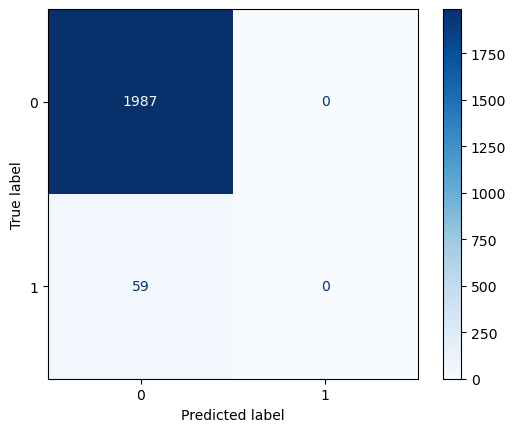

In [68]:
#Confusion Matrix for SVM
plot_confusion_matrix(svmForRaw, test_c, test_d, labels = [0,1], cmap = 'Blues')

Cross Validation Scores -> [0.9665272  0.9665272  0.96443515 0.96645702 0.96645702 0.96645702
 0.96645702 0.96645702 0.96645702 0.96645702]

Cross Validation Mean ->  0.9662688701174529


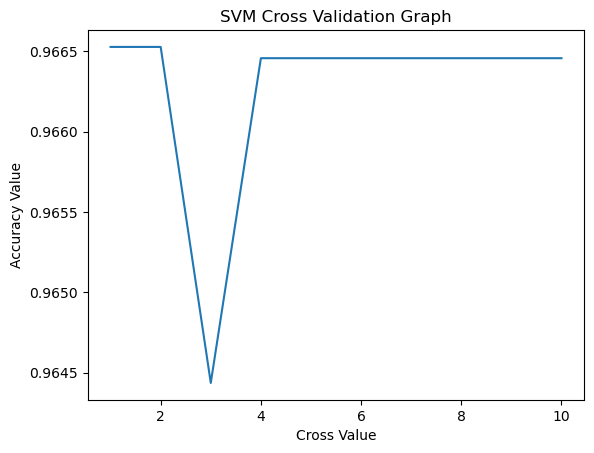

In [69]:
#Cross Validation for SVM
scores_svm2 = cross_val_score(svmForRaw, train_c, train_d, cv = 10, scoring = 'accuracy')
print('Cross Validation Scores -> {}\n'.format(scores_svm2))
print('Cross Validation Mean -> ', scores_svm2.mean())

plt.plot(range(1, 11), scores_svm2)
plt.xlabel("Cross Value")
plt.ylabel("Accuracy Value")
plt.title("SVM Cross Validation Graph")
plt.show()

In [70]:
#Logistic Regression Algorithm with Raw Data
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
bestSolver2 = ''
solver2 = ''
bestScoreLR2 = 0

for i in solvers:
    LogRegForRaw = LogisticRegression(solver = i)
    LogRegForRaw.fit(train_c, train_d)
    Y_pred_LR2 = LogRegForRaw.predict(test_c)
    accuracyScoreForLR2 = LogRegForRaw.score(test_c, test_d)
    solver2 = i
    print('çözücü {}, ve %{} başarı oranına sahip.\n'.format(solver2, accuracyScoreForLR2*100))
    if accuracyScoreForLR2 > bestScoreLR2:
        bestScoreLR2 = accuracyScoreForLR2
        bestSolver2 = i
    
scoreListForLR.append(bestScoreLR2)
        
print('Lojistik Regresyon için en iyi çözücü {}, ve %{} başarı oranına sahip.'.format(bestSolver2, bestScoreLR2*100))
print(classification_report(test_d, Y_pred_LR2))

çözücü newton-cg, ve %96.48093841642229 başarı oranına sahip.

çözücü lbfgs, ve %96.04105571847508 başarı oranına sahip.

çözücü liblinear, ve %96.13880742913001 başarı oranına sahip.

çözücü sag, ve %95.8455522971652 başarı oranına sahip.

çözücü saga, ve %95.8455522971652 başarı oranına sahip.

Lojistik Regresyon için en iyi çözücü newton-cg, ve %96.48093841642229 başarı oranına sahip.
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1987
           1       0.00      0.00      0.00        59

    accuracy                           0.96      2046
   macro avg       0.49      0.49      0.49      2046
weighted avg       0.94      0.96      0.95      2046



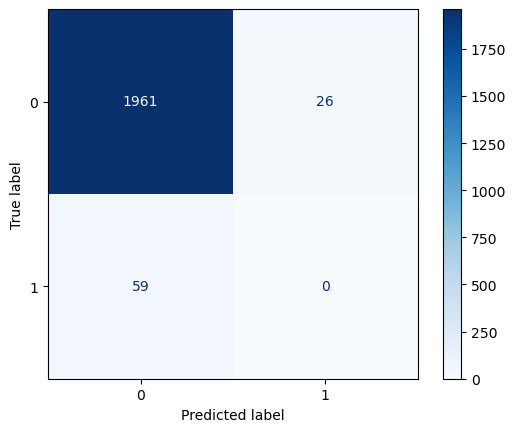

In [71]:
#Confusion Matrix for LR
plot_confusion_matrix(LogRegForRaw, test_c, test_d, labels = [0,1],cmap = 'Blues')

Cross Validation Scores -> [0.95188285 0.958159   0.96025105 0.95597484 0.94549266 0.95387841
 0.95807128 0.96436059 0.95807128 0.95387841]

Cross Validation Mean ->  0.9560020350341658


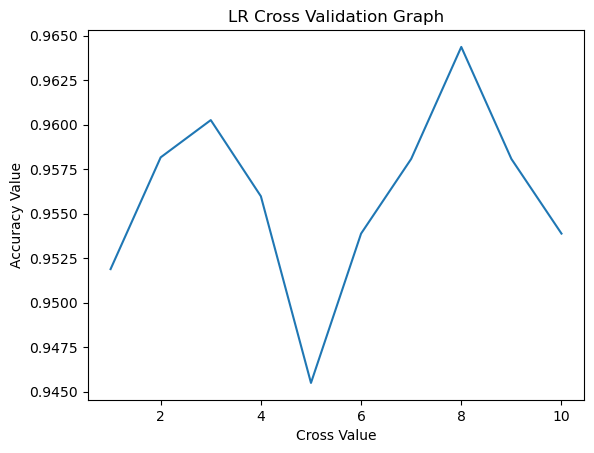

In [72]:
#Cross Validation for LR
scores_lr2 = cross_val_score(LogRegForRaw, train_c, train_d, cv = 10, scoring='accuracy')
print('Cross Validation Scores -> {}\n'.format(scores_lr2))
print('Cross Validation Mean -> ', scores_lr2.mean())

plt.plot(range(1, 11), scores_lr2)
plt.xlabel("Cross Value")
plt.ylabel("Accuracy Value")
plt.title("LR Cross Validation Graph")
plt.show()

In [73]:
#Neural Network Algorithm with Raw Data
neuralNetForRaw = MLPClassifier(hidden_layer_sizes = (10, 10, 10, 10), max_iter = 10000)
neuralNetForRaw.fit(train_c, train_d.values.ravel())
Y_pred_NN2 = neuralNetForRaw.predict(test_c)
accScoreForNN2 = neuralNetForRaw.score(test_c, test_d)

scoreListForNN.append(accScoreForNN2)

print('Multi-layer Perceptron %{} başarı oranına sahip.'.format(accScoreForNN2*100))
print(classification_report(test_d, Y_pred_NN2))

Multi-layer Perceptron %96.04105571847508 başarı oranına sahip.
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1987
           1       0.08      0.03      0.05        59

    accuracy                           0.96      2046
   macro avg       0.52      0.51      0.51      2046
weighted avg       0.95      0.96      0.95      2046



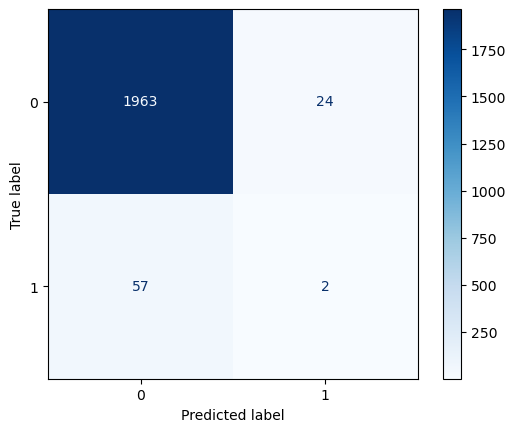

In [74]:
#Confusion Matrix for LR
plot_confusion_matrix(neuralNetForRaw, test_c, test_d, labels = [0,1],cmap = 'Blues')

Cross Validation Scores -> [0.91841004 0.95188285 0.96025105 0.93710692 0.96645702 0.93710692
 0.93710692 0.94339623 0.92243187 0.95807128]

Cross Validation Mean ->  0.9432221081901352


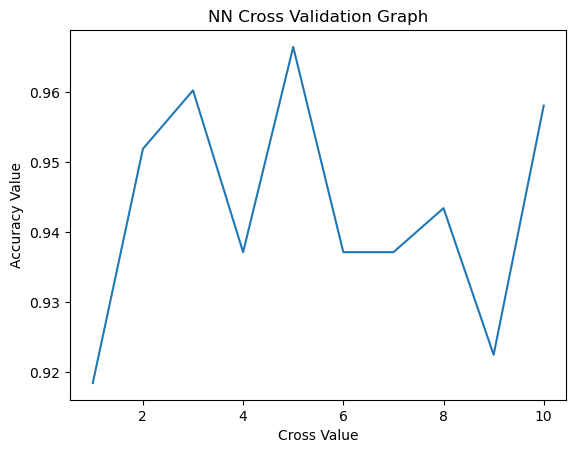

In [75]:
#Cross Validation For NN
scores_nn2 = cross_val_score(neuralNetForRaw, train_c, train_d, cv = 10, scoring='accuracy')
print('Cross Validation Scores -> {}\n'.format(scores_nn2))
print('Cross Validation Mean -> ', scores_nn2.mean())

plt.plot(range(1, 11), scores_nn2)
plt.xlabel("Cross Value")
plt.ylabel("Accuracy Value")
plt.title("NN Cross Validation Graph")
plt.show()

In [76]:
#Random Forest Algorithm with Raw Data 
randomForestForRaw = RandomForestClassifier()
randomForestForRaw.fit(train_c, train_d)
y_pred_RF2 = randomForestForRaw.predict(test_c)
accuracyScoreForRF2 = accuracy_score(test_d, y_pred_RF2)

scoreListForRF.append(accuracyScoreForRF2)

print("Random Forest Başarı oranı: %", accuracyScoreForRF2*100)
print(classification_report(test_d, y_pred_RF2))

Random Forest Başarı oranı: % 97.01857282502444
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1987
           1       0.45      0.17      0.25        59

    accuracy                           0.97      2046
   macro avg       0.72      0.58      0.62      2046
weighted avg       0.96      0.97      0.96      2046



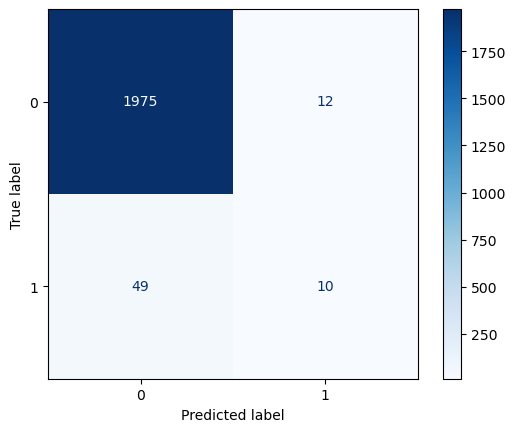

In [77]:
#Confusion Matrix for RF
plot_confusion_matrix(randomForestForRaw, test_c, test_d, labels = [0,1],cmap = 'Blues')

Cross Validation Scores -> [0.9748954  0.9748954  0.97698745 0.96645702 0.97484277 0.96855346
 0.96855346 0.96016771 0.96855346 0.96436059]

Cross Validation Mean ->  0.9698266712279502


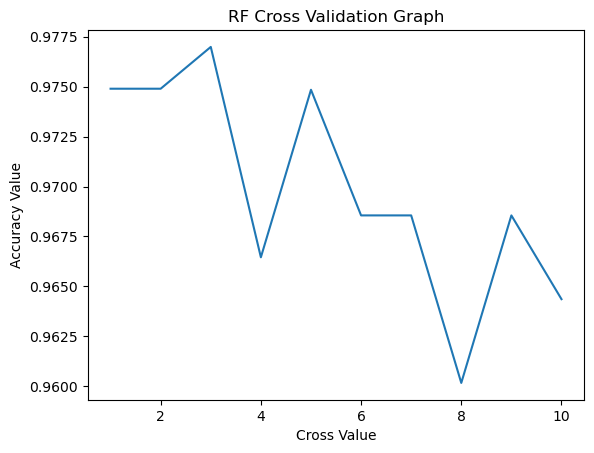

In [78]:
#Cross Validation For RF
scores_rf2 = cross_val_score(randomForestForRaw, train_c, train_d, cv = 10, scoring='accuracy')
print('Cross Validation Scores -> {}\n'.format(scores_rf2))
print('Cross Validation Mean -> ', scores_rf2.mean())

plt.plot(range(1, 11), scores_rf2)
plt.xlabel("Cross Value")
plt.ylabel("Accuracy Value")
plt.title("RF Cross Validation Graph")
plt.show()

In [79]:
#Bernoulli Naive Bayes Algorithm with Feature Selection
bernoulliNBForRaw = BernoulliNB()
bernoulliNBForRaw.fit(train_c, train_d)
y_pred_NB2 = bernoulliNBForRaw.predict(test_c)
accuracyScoreForNB2 = accuracy_score(test_d, y_pred_NB2)

scoreListForNB.append(accuracyScoreForNB2)

print("Naive Bayes başarı oranı: %", accuracyScoreForNB2*100)
print(classification_report(test_d, y_pred_NB2))

Naive Bayes başarı oranı: % 97.01857282502444
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1987
           1       0.38      0.05      0.09        59

    accuracy                           0.97      2046
   macro avg       0.67      0.52      0.54      2046
weighted avg       0.96      0.97      0.96      2046



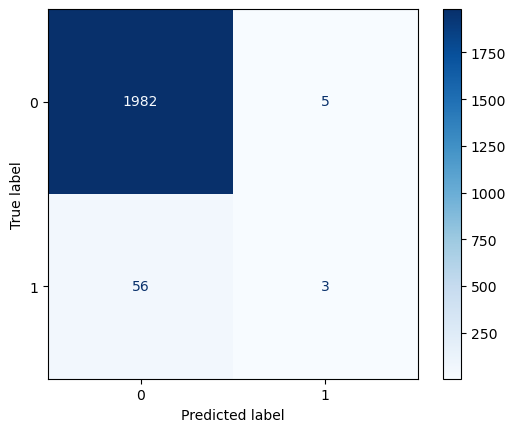

In [80]:
#Confusion Matrix for NB
plot_confusion_matrix(bernoulliNBForRaw, test_c, test_d, labels = [0,1],cmap = 'Blues')

Cross Validation Scores -> [0.96861925 0.9623431  0.9665272  0.96436059 0.95597484 0.96645702
 0.96226415 0.96436059 0.96016771 0.96436059]

Cross Validation Mean ->  0.9635435032411428


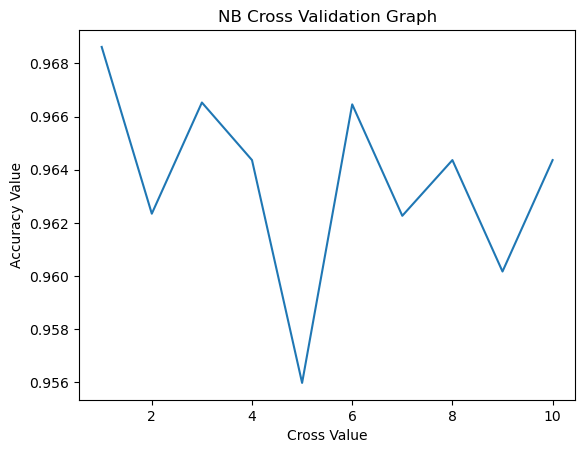

In [81]:
#Cross Validation For NB
scores_nb2 = cross_val_score(bernoulliNBForRaw, train_c, train_d, cv = 10, scoring='accuracy')
print('Cross Validation Scores -> {}\n'.format(scores_nb2))
print('Cross Validation Mean -> ', scores_nb2.mean())

plt.plot(range(1, 11), scores_nb2)
plt.xlabel("Cross Value")
plt.ylabel("Accuracy Value")
plt.title("NB Cross Validation Graph")
plt.show()

In [82]:
#Bernoulli Naive Bayes Algorithm with Processed Data
dTreeForRaw = DecisionTreeClassifier()
dTreeForRaw.fit(train_c, train_d)
y_pred_DT2 = dTreeForRaw.predict(test_c)
accuracyScoreForDT2 = dTreeForRaw.score(test_c, test_d)

scoreListForDT.append(accuracyScoreForDT2)

print('Decision Tree başarı oranı: %{}\n'.format(accuracyScoreForDT2*100))
print(classification_report(test_d, y_pred_DT2))

Decision Tree başarı oranı: %94.86803519061584

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1987
           1       0.23      0.32      0.27        59

    accuracy                           0.95      2046
   macro avg       0.60      0.64      0.62      2046
weighted avg       0.96      0.95      0.95      2046



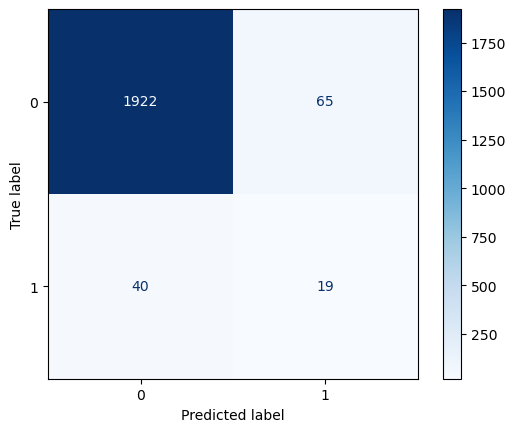

In [83]:
#Confusion Matrix for DT
plot_confusion_matrix(dTreeForRaw, test_c, test_d, labels = [0,1],cmap = 'Blues')

Cross Validation Scores -> [0.95606695 0.96443515 0.958159   0.96016771 0.94549266 0.94549266
 0.95387841 0.96016771 0.95807128 0.94129979]

Cross Validation Mean ->  0.9543231318474076


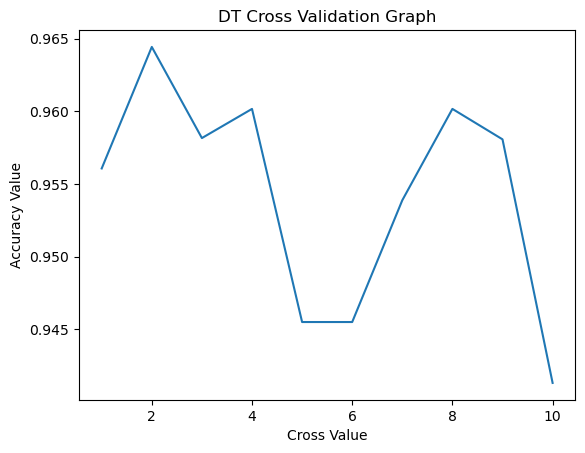

In [84]:
#Cross Validation For DT
scores_dt2 = cross_val_score(dTreeForRaw, train_c, train_d, cv = 10, scoring='accuracy')
print('Cross Validation Scores -> {}\n'.format(scores_dt2))
print('Cross Validation Mean -> ', scores_dt2.mean())

plt.plot(range(1, 11), scores_dt2)
plt.xlabel("Cross Value")
plt.ylabel("Accuracy Value")
plt.title("DT Cross Validation Graph")
plt.show()

In [85]:
table = [['                   ', 'Preprocessed Data', 'Feature Selection', 'Raw Data', 'Standard Deviation', 'Mean'], 
         ['KNN', accuracyScoreForKNN, accuracyScoreForKNN1, accuracyScoreForKNN2, np.std(scoreListForKNN), np.mean(scoreListForKNN)],
         ['SVM', accuracyScoreForSVM, accuracyScoreForSVM1, accuracyScoreForSVM2, np.std(scoreListForSVM), np.mean(scoreListForSVM)],
         ['Logistic Regression', bestScoreLR, bestScoreLR1, bestScoreLR2, np.std(scoreListForLR), np.mean(scoreListForLR)],
         ['Neural Network', accScoreForNN, accScoreForNN1, accScoreForNN2, np.std(scoreListForNN), np.mean(scoreListForNN)],
         ['Random Forest', accuracyScoreForRF, accuracyScoreForRF1, accuracyScoreForRF2, np.std(scoreListForRF), np.mean(scoreListForRF)],
         ['Naive Bayes', accuracyScoreForNB, accuracyScoreForNB1, accuracyScoreForNB2, np.std(scoreListForNB), np.mean(scoreListForNB)],
         ['Decision Tree', accuracyScoreForDT, accuracyScoreForDT1, accuracyScoreForDT2, np.std(scoreListForDT), np.mean(scoreListForDT)]]

print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═══════════════════════╤═════════════════════╤═════════════════════╤════════════╤══════════════════════╤══════════╕
│                       │   Preprocessed Data │   Feature Selection │   Raw Data │   Standard Deviation │     Mean │
╞═══════════════════════╪═════════════════════╪═════════════════════╪════════════╪══════════════════════╪══════════╡
│ KNN                   │            0.934995 │            0.971163 │   0.971652 │           0.0173708  │ 0.957992 │
├───────────────────────┼─────────────────────┼─────────────────────┼────────────┼──────────────────────┼──────────┤
│ SVM                   │            0.891496 │            0.971163 │   0.971163 │           0.0375557  │ 0.944607 │
├───────────────────────┼─────────────────────┼─────────────────────┼────────────┼──────────────────────┼──────────┤
│ Logistic Regression   │            0.882698 │            0.971163 │   0.964809 │           0.0402889  │ 0.939557 │
├───────────────────────┼─────────────────────┼─────────────────

In [86]:
end = time.perf_counter()
timeInterval = (end-start)

In [87]:
timeTable = [['Total Process Time', timeInterval]]
print(tabulate(timeTable, tablefmt = 'fancy_grid'))

╒════════════════════╤═════════╕
│ Total Process Time │ 451.362 │
╘════════════════════╧═════════╛
